## Covid 19 Case Data - United States (CA & IN focus)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import csv
import gmaps
from us import states
import numpy as np
import requests
from config import gkey
from config import rapid_api_key
from config import rapidapi_host
from pprint import pprint
import datetime as dt
import time

pd.options.display.max_rows = 4000
pd.options.display.max_rows

4000

In [2]:
#Import files to use with API's
county_path = 'Resources/us_counties_states.csv'
date_path = 'Resources/dates.csv'

In [3]:
us_counties_df = pd.read_csv(county_path)
date_df = pd.read_csv(date_path)

In [4]:
# mask1 = date_df['Date']<'2020-10-15'
# date_df=date_df[mask1]
# date_df.sort_values(by = 'Date', ascending=True, inplace = True)
# date_df

### API Calls to Pull Coronavirus Data by County

In [5]:
county_list = []
state_list = []
# map1 = us_counties_df['State']=='Nevada'
county_list = us_counties_df['County, State'].tolist()
date_list = date_df['Date'].tolist()
date_list = ['2020-12-06', '2020-12-07','2020-12-08']

# date_list = []
# rundate = dt.date.today() - dt.timedelta(days=1)
# rundate = f'{rundate.year}-{rundate.month}-{rundate.day}'
# date_list.append(rundate)
date_list

['2020-12-06', '2020-12-07', '2020-12-08']

In [6]:
# state='Texas'
# county='Dickens'
# date_val = '2020-11-09'
# country_state = "US " + state
# #  "city_name":county,

# url = "https://covid-19-statistics.p.rapidapi.com/reports"
# headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}
# querystring = {"region_province":state,"iso":"USA","region_name":"US", "city_name":county, \
#                            "date":date_val,"q":country_state}   

# response = requests.request("GET", url, headers=headers, params=querystring).json()

# pprint(response)

In [7]:
# # Run API to collect county level data
url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

# Map County Lists
map_county_state_list = []
map_new_county_list = []
map_tot_county_cases = []
map_new_county_cases = []
map_tot_county_deaths = []
map_new_county_deaths = []
map_county_date = []
map_county_lat = []
map_county_lng = []

# County Lists
county_state_list = []
new_county_list = []
tot_county_cases = []
new_county_cases = []
tot_county_deaths = []
new_county_deaths = []
county_date = []
county_lat = []
county_lng = []

record_counter = 0
set_counter = 1

for date_val in date_list:    
    try:        
#         set_counter += 1

        for name in county_list:
            value = name.split(',')
            county = value[0]
            state = value[1]
            country_state = "US " + state
            record_counter +=1

            querystring = {"region_province":state,"iso":"USA","region_name":"US","city_name":county, \
                           "date":date_val,"q":country_state}   

            response = requests.request("GET", url, headers=headers, params=querystring).json()    
            
#             time.sleep(1)
            
            try:
                # Add Map information
                map_county_state_list.append(response['data'][0]['region']['province'])
                map_new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                map_tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                map_new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                map_tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                map_new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                map_county_date.append(response['data'][0]['region']['cities'][0]['date'])
                map_county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                map_county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                # Add County information
                county_state_list.append(response['data'][0]['region']['province'])
                new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                county_date.append(response['data'][0]['region']['cities'][0]['date'])
                county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                if record_counter > len(county_list):
                    record_counter = 1
                    set_counter += 1

                print(f'Processing record {record_counter} of set {set_counter} | {county}, {state}, {date_val}.')

            except:
                record_counter -= 1
                print(f'Error: County: {county} and State:{state} not found for: {date_val}')

#         set_counter += 1
        
    except:
        
        print(f'Date Error: {date_val} was not processed for {county},{state}')
        
            
print(f'---------------------------------Process Completed----------------------------------------')


Processing record 1 of set 1 | Autauga, Alabama, 2020-12-06.
Processing record 2 of set 1 | Baldwin, Alabama, 2020-12-06.
Processing record 3 of set 1 | Barbour, Alabama, 2020-12-06.
Processing record 4 of set 1 | Bibb, Alabama, 2020-12-06.
Processing record 5 of set 1 | Blount, Alabama, 2020-12-06.
Processing record 6 of set 1 | Bullock, Alabama, 2020-12-06.
Processing record 7 of set 1 | Butler, Alabama, 2020-12-06.
Processing record 8 of set 1 | Calhoun, Alabama, 2020-12-06.
Processing record 9 of set 1 | Chambers, Alabama, 2020-12-06.
Processing record 10 of set 1 | Cherokee, Alabama, 2020-12-06.
Processing record 11 of set 1 | Chilton, Alabama, 2020-12-06.
Processing record 12 of set 1 | Choctaw, Alabama, 2020-12-06.
Processing record 13 of set 1 | Clarke, Alabama, 2020-12-06.
Processing record 14 of set 1 | Clay, Alabama, 2020-12-06.
Processing record 15 of set 1 | Cleburne, Alabama, 2020-12-06.
Processing record 16 of set 1 | Coffee, Alabama, 2020-12-06.
Processing record 17 of 

Processing record 111 of set 1 | Crittenden, Arkansas, 2020-12-06.
Processing record 112 of set 1 | Cross, Arkansas, 2020-12-06.
Processing record 113 of set 1 | Dallas, Arkansas, 2020-12-06.
Processing record 114 of set 1 | Desha, Arkansas, 2020-12-06.
Processing record 115 of set 1 | Drew, Arkansas, 2020-12-06.
Processing record 116 of set 1 | Faulkner, Arkansas, 2020-12-06.
Processing record 117 of set 1 | Franklin, Arkansas, 2020-12-06.
Processing record 118 of set 1 | Fulton, Arkansas, 2020-12-06.
Processing record 119 of set 1 | Garland, Arkansas, 2020-12-06.
Processing record 120 of set 1 | Grant, Arkansas, 2020-12-06.
Processing record 121 of set 1 | Greene, Arkansas, 2020-12-06.
Processing record 122 of set 1 | Hempstead, Arkansas, 2020-12-06.
Processing record 123 of set 1 | Hot Spring, Arkansas, 2020-12-06.
Processing record 124 of set 1 | Howard, Arkansas, 2020-12-06.
Processing record 125 of set 1 | Independence, Arkansas, 2020-12-06.
Processing record 126 of set 1 | Izard

Processing record 235 of set 1 | Clear Creek, Colorado, 2020-12-06.
Processing record 236 of set 1 | Conejos, Colorado, 2020-12-06.
Processing record 237 of set 1 | Costilla, Colorado, 2020-12-06.
Processing record 238 of set 1 | Crowley, Colorado, 2020-12-06.
Processing record 239 of set 1 | Custer, Colorado, 2020-12-06.
Processing record 240 of set 1 | Delta, Colorado, 2020-12-06.
Error: County: Denver and State: City and Co not found for: 2020-12-06
Processing record 241 of set 1 | Dolores, Colorado, 2020-12-06.
Processing record 242 of set 1 | Douglas, Colorado, 2020-12-06.
Processing record 243 of set 1 | Eagle, Colorado, 2020-12-06.
Processing record 244 of set 1 | Elbert, Colorado, 2020-12-06.
Processing record 245 of set 1 | El Paso, Colorado, 2020-12-06.
Processing record 246 of set 1 | Fremont, Colorado, 2020-12-06.
Processing record 247 of set 1 | Garfield, Colorado, 2020-12-06.
Processing record 248 of set 1 | Gilpin, Colorado, 2020-12-06.
Processing record 249 of set 1 | G

Processing record 362 of set 1 | Volusia, Florida, 2020-12-06.
Processing record 363 of set 1 | Wakulla, Florida, 2020-12-06.
Processing record 364 of set 1 | Walton, Florida, 2020-12-06.
Processing record 365 of set 1 | Washington, Florida, 2020-12-06.
Processing record 366 of set 1 | Appling, Georgia, 2020-12-06.
Processing record 367 of set 1 | Atkinson, Georgia, 2020-12-06.
Processing record 368 of set 1 | Bacon, Georgia, 2020-12-06.
Processing record 369 of set 1 | Baker, Georgia, 2020-12-06.
Processing record 370 of set 1 | Baldwin, Georgia, 2020-12-06.
Processing record 371 of set 1 | Banks, Georgia, 2020-12-06.
Processing record 372 of set 1 | Barrow, Georgia, 2020-12-06.
Processing record 373 of set 1 | Bartow, Georgia, 2020-12-06.
Processing record 374 of set 1 | Ben Hill, Georgia, 2020-12-06.
Processing record 375 of set 1 | Berrien, Georgia, 2020-12-06.
Processing record 376 of set 1 | Bibb, Georgia, 2020-12-06.
Processing record 377 of set 1 | Bleckley, Georgia, 2020-12-06

Processing record 493 of set 1 | Stewart, Georgia, 2020-12-06.
Processing record 494 of set 1 | Sumter, Georgia, 2020-12-06.
Processing record 495 of set 1 | Talbot, Georgia, 2020-12-06.
Processing record 496 of set 1 | Taliaferro, Georgia, 2020-12-06.
Processing record 497 of set 1 | Tattnall, Georgia, 2020-12-06.
Processing record 498 of set 1 | Taylor, Georgia, 2020-12-06.
Processing record 499 of set 1 | Telfair, Georgia, 2020-12-06.
Processing record 500 of set 1 | Terrell, Georgia, 2020-12-06.
Processing record 501 of set 1 | Thomas, Georgia, 2020-12-06.
Processing record 502 of set 1 | Tift, Georgia, 2020-12-06.
Processing record 503 of set 1 | Toombs, Georgia, 2020-12-06.
Processing record 504 of set 1 | Towns, Georgia, 2020-12-06.
Processing record 505 of set 1 | Treutlen, Georgia, 2020-12-06.
Processing record 506 of set 1 | Troup, Georgia, 2020-12-06.
Processing record 507 of set 1 | Turner, Georgia, 2020-12-06.
Processing record 508 of set 1 | Twiggs, Georgia, 2020-12-06.
P

Processing record 620 of set 1 | Lee, Illinois, 2020-12-06.
Processing record 621 of set 1 | Livingston, Illinois, 2020-12-06.
Processing record 622 of set 1 | Logan, Illinois, 2020-12-06.
Processing record 623 of set 1 | McDonough, Illinois, 2020-12-06.
Processing record 624 of set 1 | McHenry, Illinois, 2020-12-06.
Processing record 625 of set 1 | McLean, Illinois, 2020-12-06.
Processing record 626 of set 1 | Macon, Illinois, 2020-12-06.
Processing record 627 of set 1 | Macoupin, Illinois, 2020-12-06.
Processing record 628 of set 1 | Madison, Illinois, 2020-12-06.
Processing record 629 of set 1 | Marion, Illinois, 2020-12-06.
Processing record 630 of set 1 | Marshall, Illinois, 2020-12-06.
Processing record 631 of set 1 | Mason, Illinois, 2020-12-06.
Processing record 632 of set 1 | Massac, Illinois, 2020-12-06.
Processing record 633 of set 1 | Menard, Illinois, 2020-12-06.
Processing record 634 of set 1 | Mercer, Illinois, 2020-12-06.
Processing record 635 of set 1 | Monroe, Illinoi

Processing record 750 of set 1 | Tipton, Indiana, 2020-12-06.
Processing record 751 of set 1 | Union, Indiana, 2020-12-06.
Processing record 752 of set 1 | Vanderburgh, Indiana, 2020-12-06.
Processing record 753 of set 1 | Vermillion, Indiana, 2020-12-06.
Processing record 754 of set 1 | Vigo, Indiana, 2020-12-06.
Processing record 755 of set 1 | Wabash, Indiana, 2020-12-06.
Processing record 756 of set 1 | Warren, Indiana, 2020-12-06.
Processing record 757 of set 1 | Warrick, Indiana, 2020-12-06.
Processing record 758 of set 1 | Washington, Indiana, 2020-12-06.
Processing record 759 of set 1 | Wayne, Indiana, 2020-12-06.
Processing record 760 of set 1 | Wells, Indiana, 2020-12-06.
Processing record 761 of set 1 | White, Indiana, 2020-12-06.
Processing record 762 of set 1 | Whitley, Indiana, 2020-12-06.
Processing record 763 of set 1 | Adair, Iowa, 2020-12-06.
Processing record 764 of set 1 | Adams, Iowa, 2020-12-06.
Processing record 765 of set 1 | Allamakee, Iowa, 2020-12-06.
Process

Processing record 886 of set 1 | Elk, Kansas, 2020-12-06.
Processing record 887 of set 1 | Ellis, Kansas, 2020-12-06.
Processing record 888 of set 1 | Ellsworth, Kansas, 2020-12-06.
Processing record 889 of set 1 | Finney, Kansas, 2020-12-06.
Processing record 890 of set 1 | Ford, Kansas, 2020-12-06.
Processing record 891 of set 1 | Franklin, Kansas, 2020-12-06.
Processing record 892 of set 1 | Geary, Kansas, 2020-12-06.
Processing record 893 of set 1 | Gove, Kansas, 2020-12-06.
Processing record 894 of set 1 | Graham, Kansas, 2020-12-06.
Processing record 895 of set 1 | Grant, Kansas, 2020-12-06.
Processing record 896 of set 1 | Gray, Kansas, 2020-12-06.
Processing record 897 of set 1 | Greeley, Kansas, 2020-12-06.
Processing record 898 of set 1 | Greenwood, Kansas, 2020-12-06.
Processing record 899 of set 1 | Hamilton, Kansas, 2020-12-06.
Processing record 900 of set 1 | Harper, Kansas, 2020-12-06.
Processing record 901 of set 1 | Harvey, Kansas, 2020-12-06.
Processing record 902 of 

Processing record 1018 of set 1 | Henry, Kentucky, 2020-12-06.
Processing record 1019 of set 1 | Hickman, Kentucky, 2020-12-06.
Processing record 1020 of set 1 | Hopkins, Kentucky, 2020-12-06.
Processing record 1021 of set 1 | Jackson, Kentucky, 2020-12-06.
Processing record 1022 of set 1 | Jefferson, Kentucky, 2020-12-06.
Processing record 1023 of set 1 | Jessamine, Kentucky, 2020-12-06.
Processing record 1024 of set 1 | Johnson, Kentucky, 2020-12-06.
Processing record 1025 of set 1 | Kenton, Kentucky, 2020-12-06.
Processing record 1026 of set 1 | Knott, Kentucky, 2020-12-06.
Processing record 1027 of set 1 | Knox, Kentucky, 2020-12-06.
Processing record 1028 of set 1 | Larue, Kentucky, 2020-12-06.
Processing record 1029 of set 1 | Laurel, Kentucky, 2020-12-06.
Processing record 1030 of set 1 | Lawrence, Kentucky, 2020-12-06.
Processing record 1031 of set 1 | Lee, Kentucky, 2020-12-06.
Processing record 1032 of set 1 | Leslie, Kentucky, 2020-12-06.
Processing record 1033 of set 1 | Le

Processing record 1142 of set 1 | Union, Louisiana, 2020-12-06.
Processing record 1143 of set 1 | Vermilion, Louisiana, 2020-12-06.
Processing record 1144 of set 1 | Vernon, Louisiana, 2020-12-06.
Processing record 1145 of set 1 | Washington, Louisiana, 2020-12-06.
Processing record 1146 of set 1 | Webster, Louisiana, 2020-12-06.
Processing record 1147 of set 1 | West Baton Rouge, Louisiana, 2020-12-06.
Processing record 1148 of set 1 | West Carroll, Louisiana, 2020-12-06.
Processing record 1149 of set 1 | West Feliciana, Louisiana, 2020-12-06.
Processing record 1150 of set 1 | Winn, Louisiana, 2020-12-06.
Processing record 1151 of set 1 | Androscoggin, Maine, 2020-12-06.
Processing record 1152 of set 1 | Aroostook, Maine, 2020-12-06.
Processing record 1153 of set 1 | Cumberland, Maine, 2020-12-06.
Processing record 1154 of set 1 | Franklin, Maine, 2020-12-06.
Processing record 1155 of set 1 | Hancock, Maine, 2020-12-06.
Processing record 1156 of set 1 | Kennebec, Maine, 2020-12-06.
Pr

Processing record 1265 of set 1 | Oakland, Michigan, 2020-12-06.
Processing record 1266 of set 1 | Oceana, Michigan, 2020-12-06.
Processing record 1267 of set 1 | Ogemaw, Michigan, 2020-12-06.
Processing record 1268 of set 1 | Ontonagon, Michigan, 2020-12-06.
Processing record 1269 of set 1 | Osceola, Michigan, 2020-12-06.
Processing record 1270 of set 1 | Oscoda, Michigan, 2020-12-06.
Processing record 1271 of set 1 | Otsego, Michigan, 2020-12-06.
Processing record 1272 of set 1 | Ottawa, Michigan, 2020-12-06.
Processing record 1273 of set 1 | Presque Isle, Michigan, 2020-12-06.
Processing record 1274 of set 1 | Roscommon, Michigan, 2020-12-06.
Processing record 1275 of set 1 | Saginaw, Michigan, 2020-12-06.
Processing record 1276 of set 1 | St. Clair, Michigan, 2020-12-06.
Processing record 1277 of set 1 | St. Joseph, Michigan, 2020-12-06.
Processing record 1278 of set 1 | Sanilac, Michigan, 2020-12-06.
Processing record 1279 of set 1 | Schoolcraft, Michigan, 2020-12-06.
Processing r

Processing record 1389 of set 1 | DeSoto, Mississippi, 2020-12-06.
Processing record 1390 of set 1 | Forrest, Mississippi, 2020-12-06.
Processing record 1391 of set 1 | Franklin, Mississippi, 2020-12-06.
Processing record 1392 of set 1 | George, Mississippi, 2020-12-06.
Processing record 1393 of set 1 | Greene, Mississippi, 2020-12-06.
Processing record 1394 of set 1 | Grenada, Mississippi, 2020-12-06.
Processing record 1395 of set 1 | Hancock, Mississippi, 2020-12-06.
Processing record 1396 of set 1 | Harrison, Mississippi, 2020-12-06.
Processing record 1397 of set 1 | Hinds, Mississippi, 2020-12-06.
Processing record 1398 of set 1 | Holmes, Mississippi, 2020-12-06.
Processing record 1399 of set 1 | Humphreys, Mississippi, 2020-12-06.
Processing record 1400 of set 1 | Issaquena, Mississippi, 2020-12-06.
Processing record 1401 of set 1 | Itawamba, Mississippi, 2020-12-06.
Processing record 1402 of set 1 | Jackson, Mississippi, 2020-12-06.
Processing record 1403 of set 1 | Jasper, Missi

Processing record 1513 of set 1 | Livingston, Missouri, 2020-12-06.
Processing record 1514 of set 1 | McDonald, Missouri, 2020-12-06.
Processing record 1515 of set 1 | Macon, Missouri, 2020-12-06.
Processing record 1516 of set 1 | Madison, Missouri, 2020-12-06.
Processing record 1517 of set 1 | Maries, Missouri, 2020-12-06.
Processing record 1518 of set 1 | Marion, Missouri, 2020-12-06.
Processing record 1519 of set 1 | Mercer, Missouri, 2020-12-06.
Processing record 1520 of set 1 | Miller, Missouri, 2020-12-06.
Processing record 1521 of set 1 | Mississippi, Missouri, 2020-12-06.
Processing record 1522 of set 1 | Moniteau, Missouri, 2020-12-06.
Processing record 1523 of set 1 | Monroe, Missouri, 2020-12-06.
Processing record 1524 of set 1 | Montgomery, Missouri, 2020-12-06.
Processing record 1525 of set 1 | Morgan, Missouri, 2020-12-06.
Processing record 1526 of set 1 | New Madrid, Missouri, 2020-12-06.
Processing record 1527 of set 1 | Newton, Missouri, 2020-12-06.
Processing record 1

Processing record 1640 of set 1 | Chase, Nebraska, 2020-12-06.
Processing record 1641 of set 1 | Cherry, Nebraska, 2020-12-06.
Processing record 1642 of set 1 | Cheyenne, Nebraska, 2020-12-06.
Processing record 1643 of set 1 | Clay, Nebraska, 2020-12-06.
Processing record 1644 of set 1 | Colfax, Nebraska, 2020-12-06.
Processing record 1645 of set 1 | Cuming, Nebraska, 2020-12-06.
Processing record 1646 of set 1 | Custer, Nebraska, 2020-12-06.
Processing record 1647 of set 1 | Dakota, Nebraska, 2020-12-06.
Processing record 1648 of set 1 | Dawes, Nebraska, 2020-12-06.
Processing record 1649 of set 1 | Dawson, Nebraska, 2020-12-06.
Processing record 1650 of set 1 | Deuel, Nebraska, 2020-12-06.
Processing record 1651 of set 1 | Dixon, Nebraska, 2020-12-06.
Processing record 1652 of set 1 | Dodge, Nebraska, 2020-12-06.
Processing record 1653 of set 1 | Douglas, Nebraska, 2020-12-06.
Processing record 1654 of set 1 | Dundy, Nebraska, 2020-12-06.
Processing record 1655 of set 1 | Fillmore, N

Processing record 1765 of set 1 | Warren, New Jersey, 2020-12-06.
Processing record 1766 of set 1 | Bernalillo, New Mexico, 2020-12-06.
Processing record 1767 of set 1 | Catron, New Mexico, 2020-12-06.
Processing record 1768 of set 1 | Chaves, New Mexico, 2020-12-06.
Processing record 1769 of set 1 | Cibola, New Mexico, 2020-12-06.
Processing record 1770 of set 1 | Colfax, New Mexico, 2020-12-06.
Processing record 1771 of set 1 | Curry, New Mexico, 2020-12-06.
Processing record 1772 of set 1 | De Baca, New Mexico, 2020-12-06.
Processing record 1773 of set 1 | Doña Ana, New Mexico, 2020-12-06.
Processing record 1774 of set 1 | Eddy, New Mexico, 2020-12-06.
Processing record 1775 of set 1 | Grant, New Mexico, 2020-12-06.
Processing record 1776 of set 1 | Guadalupe, New Mexico, 2020-12-06.
Processing record 1777 of set 1 | Harding, New Mexico, 2020-12-06.
Processing record 1778 of set 1 | Hidalgo, New Mexico, 2020-12-06.
Processing record 1779 of set 1 | Lea, New Mexico, 2020-12-06.
Proce

Processing record 1888 of set 1 | Dare, North Carolina, 2020-12-06.
Processing record 1889 of set 1 | Davidson, North Carolina, 2020-12-06.
Processing record 1890 of set 1 | Davie, North Carolina, 2020-12-06.
Processing record 1891 of set 1 | Duplin, North Carolina, 2020-12-06.
Processing record 1892 of set 1 | Durham, North Carolina, 2020-12-06.
Processing record 1893 of set 1 | Edgecombe, North Carolina, 2020-12-06.
Processing record 1894 of set 1 | Forsyth, North Carolina, 2020-12-06.
Processing record 1895 of set 1 | Franklin, North Carolina, 2020-12-06.
Processing record 1896 of set 1 | Gaston, North Carolina, 2020-12-06.
Processing record 1897 of set 1 | Gates, North Carolina, 2020-12-06.
Processing record 1898 of set 1 | Graham, North Carolina, 2020-12-06.
Processing record 1899 of set 1 | Granville, North Carolina, 2020-12-06.
Processing record 1900 of set 1 | Greene, North Carolina, 2020-12-06.
Processing record 1901 of set 1 | Guilford, North Carolina, 2020-12-06.
Processing 

Processing record 2006 of set 1 | Steele, North Dakota, 2020-12-06.
Processing record 2007 of set 1 | Stutsman, North Dakota, 2020-12-06.
Processing record 2008 of set 1 | Towner, North Dakota, 2020-12-06.
Processing record 2009 of set 1 | Traill, North Dakota, 2020-12-06.
Processing record 2010 of set 1 | Walsh, North Dakota, 2020-12-06.
Processing record 2011 of set 1 | Ward, North Dakota, 2020-12-06.
Processing record 2012 of set 1 | Wells, North Dakota, 2020-12-06.
Processing record 2013 of set 1 | Williams, North Dakota, 2020-12-06.
Processing record 2014 of set 1 | Adams, Ohio, 2020-12-06.
Processing record 2015 of set 1 | Allen, Ohio, 2020-12-06.
Processing record 2016 of set 1 | Ashland, Ohio, 2020-12-06.
Processing record 2017 of set 1 | Ashtabula, Ohio, 2020-12-06.
Processing record 2018 of set 1 | Athens, Ohio, 2020-12-06.
Processing record 2019 of set 1 | Auglaize, Ohio, 2020-12-06.
Processing record 2020 of set 1 | Belmont, Ohio, 2020-12-06.
Processing record 2021 of set 1

Processing record 2138 of set 1 | Kingfisher, Oklahoma, 2020-12-06.
Processing record 2139 of set 1 | Kiowa, Oklahoma, 2020-12-06.
Processing record 2140 of set 1 | Latimer, Oklahoma, 2020-12-06.
Processing record 2141 of set 1 | Le Flore, Oklahoma, 2020-12-06.
Processing record 2142 of set 1 | Lincoln, Oklahoma, 2020-12-06.
Processing record 2143 of set 1 | Logan, Oklahoma, 2020-12-06.
Processing record 2144 of set 1 | Love, Oklahoma, 2020-12-06.
Processing record 2145 of set 1 | McClain, Oklahoma, 2020-12-06.
Processing record 2146 of set 1 | McCurtain, Oklahoma, 2020-12-06.
Processing record 2147 of set 1 | McIntosh, Oklahoma, 2020-12-06.
Processing record 2148 of set 1 | Major, Oklahoma, 2020-12-06.
Processing record 2149 of set 1 | Marshall, Oklahoma, 2020-12-06.
Processing record 2150 of set 1 | Mayes, Oklahoma, 2020-12-06.
Processing record 2151 of set 1 | Murray, Oklahoma, 2020-12-06.
Processing record 2152 of set 1 | Muskogee, Oklahoma, 2020-12-06.
Processing record 2153 of se

Processing record 2263 of set 1 | Northumberland, Pennsylvania, 2020-12-06.
Processing record 2264 of set 1 | Perry, Pennsylvania, 2020-12-06.
Processing record 2265 of set 1 | Philadelphia, Pennsylvania, 2020-12-06.
Processing record 2266 of set 1 | Pike, Pennsylvania, 2020-12-06.
Processing record 2267 of set 1 | Potter, Pennsylvania, 2020-12-06.
Processing record 2268 of set 1 | Schuylkill, Pennsylvania, 2020-12-06.
Processing record 2269 of set 1 | Snyder, Pennsylvania, 2020-12-06.
Processing record 2270 of set 1 | Somerset, Pennsylvania, 2020-12-06.
Processing record 2271 of set 1 | Sullivan, Pennsylvania, 2020-12-06.
Processing record 2272 of set 1 | Susquehanna, Pennsylvania, 2020-12-06.
Processing record 2273 of set 1 | Tioga, Pennsylvania, 2020-12-06.
Processing record 2274 of set 1 | Union, Pennsylvania, 2020-12-06.
Processing record 2275 of set 1 | Venango, Pennsylvania, 2020-12-06.
Processing record 2276 of set 1 | Warren, Pennsylvania, 2020-12-06.
Processing record 2277 of

Processing record 2380 of set 1 | Miner, South Dakota, 2020-12-06.
Processing record 2381 of set 1 | Minnehaha, South Dakota, 2020-12-06.
Processing record 2382 of set 1 | Moody, South Dakota, 2020-12-06.
Processing record 2383 of set 1 | Pennington, South Dakota, 2020-12-06.
Processing record 2384 of set 1 | Perkins, South Dakota, 2020-12-06.
Processing record 2385 of set 1 | Potter, South Dakota, 2020-12-06.
Processing record 2386 of set 1 | Roberts, South Dakota, 2020-12-06.
Processing record 2387 of set 1 | Sanborn, South Dakota, 2020-12-06.
Error: County: Shannon and State:South Dakota not found for: 2020-12-06
Processing record 2388 of set 1 | Spink, South Dakota, 2020-12-06.
Processing record 2389 of set 1 | Stanley, South Dakota, 2020-12-06.
Processing record 2390 of set 1 | Sully, South Dakota, 2020-12-06.
Processing record 2391 of set 1 | Todd, South Dakota, 2020-12-06.
Processing record 2392 of set 1 | Tripp, South Dakota, 2020-12-06.
Processing record 2393 of set 1 | Turner

Processing record 2504 of set 1 | Baylor, Texas, 2020-12-06.
Processing record 2505 of set 1 | Bee, Texas, 2020-12-06.
Processing record 2506 of set 1 | Bell, Texas, 2020-12-06.
Processing record 2507 of set 1 | Bexar, Texas, 2020-12-06.
Processing record 2508 of set 1 | Blanco, Texas, 2020-12-06.
Processing record 2509 of set 1 | Borden, Texas, 2020-12-06.
Processing record 2510 of set 1 | Bosque, Texas, 2020-12-06.
Processing record 2511 of set 1 | Bowie, Texas, 2020-12-06.
Processing record 2512 of set 1 | Brazoria, Texas, 2020-12-06.
Processing record 2513 of set 1 | Brazos, Texas, 2020-12-06.
Processing record 2514 of set 1 | Brewster, Texas, 2020-12-06.
Processing record 2515 of set 1 | Briscoe, Texas, 2020-12-06.
Processing record 2516 of set 1 | Brooks, Texas, 2020-12-06.
Processing record 2517 of set 1 | Brown, Texas, 2020-12-06.
Processing record 2518 of set 1 | Burleson, Texas, 2020-12-06.
Processing record 2519 of set 1 | Burnet, Texas, 2020-12-06.
Processing record 2520 of

Processing record 2638 of set 1 | Liberty, Texas, 2020-12-06.
Processing record 2639 of set 1 | Limestone, Texas, 2020-12-06.
Processing record 2640 of set 1 | Lipscomb, Texas, 2020-12-06.
Processing record 2641 of set 1 | Live Oak, Texas, 2020-12-06.
Processing record 2642 of set 1 | Llano, Texas, 2020-12-06.
Processing record 2643 of set 1 | Loving, Texas, 2020-12-06.
Processing record 2644 of set 1 | Lubbock, Texas, 2020-12-06.
Processing record 2645 of set 1 | Lynn, Texas, 2020-12-06.
Processing record 2646 of set 1 | McCulloch, Texas, 2020-12-06.
Processing record 2647 of set 1 | McLennan, Texas, 2020-12-06.
Processing record 2648 of set 1 | McMullen, Texas, 2020-12-06.
Processing record 2649 of set 1 | Madison, Texas, 2020-12-06.
Processing record 2650 of set 1 | Marion, Texas, 2020-12-06.
Processing record 2651 of set 1 | Martin, Texas, 2020-12-06.
Processing record 2652 of set 1 | Mason, Texas, 2020-12-06.
Processing record 2653 of set 1 | Matagorda, Texas, 2020-12-06.
Processi

Processing record 2752 of set 1 | Utah, Utah, 2020-12-06.
Processing record 2753 of set 1 | Wasatch, Utah, 2020-12-06.
Error: County: Washington and State:Utah not found for: 2020-12-06
Error: County: Wayne and State:Utah not found for: 2020-12-06
Error: County: Weber and State:Utah not found for: 2020-12-06
Processing record 2754 of set 1 | Addison, Vermont, 2020-12-06.
Processing record 2755 of set 1 | Bennington, Vermont, 2020-12-06.
Processing record 2756 of set 1 | Caledonia, Vermont, 2020-12-06.
Processing record 2757 of set 1 | Chittenden, Vermont, 2020-12-06.
Processing record 2758 of set 1 | Essex, Vermont, 2020-12-06.
Processing record 2759 of set 1 | Franklin, Vermont, 2020-12-06.
Processing record 2760 of set 1 | Grand Isle, Vermont, 2020-12-06.
Processing record 2761 of set 1 | Lamoille, Vermont, 2020-12-06.
Processing record 2762 of set 1 | Orange, Vermont, 2020-12-06.
Processing record 2763 of set 1 | Orleans, Vermont, 2020-12-06.
Processing record 2764 of set 1 | Rutlan

Processing record 2873 of set 1 | Fairfax, Virginia, 2020-12-06.
Processing record 2874 of set 1 | Falls Church, Virginia, 2020-12-06.
Processing record 2875 of set 1 | Franklin, Virginia, 2020-12-06.
Processing record 2876 of set 1 | Fredericksburg, Virginia, 2020-12-06.
Processing record 2877 of set 1 | Galax, Virginia, 2020-12-06.
Processing record 2878 of set 1 | Hampton, Virginia, 2020-12-06.
Processing record 2879 of set 1 | Harrisonburg, Virginia, 2020-12-06.
Processing record 2880 of set 1 | Hopewell, Virginia, 2020-12-06.
Processing record 2881 of set 1 | Lexington, Virginia, 2020-12-06.
Processing record 2882 of set 1 | Lynchburg, Virginia, 2020-12-06.
Processing record 2883 of set 1 | Manassas, Virginia, 2020-12-06.
Processing record 2884 of set 1 | Manassas Park, Virginia, 2020-12-06.
Processing record 2885 of set 1 | Martinsville, Virginia, 2020-12-06.
Processing record 2886 of set 1 | Newport News, Virginia, 2020-12-06.
Processing record 2887 of set 1 | Norfolk, Virginia,

Processing record 2993 of set 1 | Wirt, West Virginia, 2020-12-06.
Processing record 2994 of set 1 | Wood, West Virginia, 2020-12-06.
Processing record 2995 of set 1 | Wyoming, West Virginia, 2020-12-06.
Processing record 2996 of set 1 | Adams, Wisconsin, 2020-12-06.
Processing record 2997 of set 1 | Ashland, Wisconsin, 2020-12-06.
Processing record 2998 of set 1 | Barron, Wisconsin, 2020-12-06.
Processing record 2999 of set 1 | Bayfield, Wisconsin, 2020-12-06.
Processing record 3000 of set 1 | Brown, Wisconsin, 2020-12-06.
Processing record 3001 of set 1 | Buffalo, Wisconsin, 2020-12-06.
Processing record 3002 of set 1 | Burnett, Wisconsin, 2020-12-06.
Processing record 3003 of set 1 | Calumet, Wisconsin, 2020-12-06.
Processing record 3004 of set 1 | Chippewa, Wisconsin, 2020-12-06.
Processing record 3005 of set 1 | Clark, Wisconsin, 2020-12-06.
Processing record 3006 of set 1 | Columbia, Wisconsin, 2020-12-06.
Processing record 3007 of set 1 | Crawford, Wisconsin, 2020-12-06.
Process

Processing record 3119 of set 1 | Fayette, Alabama, 2020-12-07.
Processing record 3120 of set 1 | Franklin, Alabama, 2020-12-07.
Processing record 3121 of set 1 | Geneva, Alabama, 2020-12-07.
Processing record 3122 of set 1 | Greene, Alabama, 2020-12-07.
Processing record 3123 of set 1 | Hale, Alabama, 2020-12-07.
Processing record 3124 of set 1 | Henry, Alabama, 2020-12-07.
Processing record 3125 of set 1 | Houston, Alabama, 2020-12-07.
Processing record 3126 of set 1 | Jackson, Alabama, 2020-12-07.
Processing record 3127 of set 1 | Jefferson, Alabama, 2020-12-07.
Processing record 3128 of set 1 | Lamar, Alabama, 2020-12-07.
Processing record 3129 of set 1 | Lauderdale, Alabama, 2020-12-07.
Processing record 3130 of set 1 | Lawrence, Alabama, 2020-12-07.
Processing record 3131 of set 1 | Lee, Alabama, 2020-12-07.
Processing record 3132 of set 1 | Limestone, Alabama, 2020-12-07.
Processing record 3133 of set 1 | Lowndes, Alabama, 2020-12-07.
Processing record 3134 of set 1 | Macon, Ala

Processing record 85 of set 2 | Marion, Arkansas, 2020-12-07.
Processing record 86 of set 2 | Miller, Arkansas, 2020-12-07.
Processing record 87 of set 2 | Mississippi, Arkansas, 2020-12-07.
Processing record 88 of set 2 | Monroe, Arkansas, 2020-12-07.
Processing record 89 of set 2 | Montgomery, Arkansas, 2020-12-07.
Processing record 90 of set 2 | Nevada, Arkansas, 2020-12-07.
Processing record 91 of set 2 | Newton, Arkansas, 2020-12-07.
Processing record 92 of set 2 | Ouachita, Arkansas, 2020-12-07.
Processing record 93 of set 2 | Perry, Arkansas, 2020-12-07.
Processing record 94 of set 2 | Phillips, Arkansas, 2020-12-07.
Processing record 95 of set 2 | Pike, Arkansas, 2020-12-07.
Processing record 96 of set 2 | Poinsett, Arkansas, 2020-12-07.
Processing record 97 of set 2 | Polk, Arkansas, 2020-12-07.
Processing record 98 of set 2 | Pope, Arkansas, 2020-12-07.
Processing record 99 of set 2 | Prairie, Arkansas, 2020-12-07.
Processing record 100 of set 2 | Pulaski, Arkansas, 2020-12-0

Processing record 208 of set 2 | Lincoln, Colorado, 2020-12-07.
Processing record 209 of set 2 | Logan, Colorado, 2020-12-07.
Processing record 210 of set 2 | Mesa, Colorado, 2020-12-07.
Processing record 211 of set 2 | Mineral, Colorado, 2020-12-07.
Processing record 212 of set 2 | Moffat, Colorado, 2020-12-07.
Processing record 213 of set 2 | Montezuma, Colorado, 2020-12-07.
Processing record 214 of set 2 | Montrose, Colorado, 2020-12-07.
Processing record 215 of set 2 | Morgan, Colorado, 2020-12-07.
Processing record 216 of set 2 | Otero, Colorado, 2020-12-07.
Processing record 217 of set 2 | Ouray, Colorado, 2020-12-07.
Processing record 218 of set 2 | Park, Colorado, 2020-12-07.
Processing record 219 of set 2 | Phillips, Colorado, 2020-12-07.
Processing record 220 of set 2 | Pitkin, Colorado, 2020-12-07.
Processing record 221 of set 2 | Prowers, Colorado, 2020-12-07.
Processing record 222 of set 2 | Pueblo, Colorado, 2020-12-07.
Processing record 223 of set 2 | Rio Blanco, Colorad

Processing record 336 of set 2 | Charlton, Georgia, 2020-12-07.
Processing record 337 of set 2 | Chatham, Georgia, 2020-12-07.
Processing record 338 of set 2 | Chattahoochee, Georgia, 2020-12-07.
Processing record 339 of set 2 | Chattooga, Georgia, 2020-12-07.
Processing record 340 of set 2 | Cherokee, Georgia, 2020-12-07.
Processing record 341 of set 2 | Clarke, Georgia, 2020-12-07.
Processing record 342 of set 2 | Clay, Georgia, 2020-12-07.
Processing record 343 of set 2 | Clayton, Georgia, 2020-12-07.
Processing record 344 of set 2 | Clinch, Georgia, 2020-12-07.
Processing record 345 of set 2 | Cobb, Georgia, 2020-12-07.
Processing record 346 of set 2 | Coffee, Georgia, 2020-12-07.
Processing record 347 of set 2 | Colquitt, Georgia, 2020-12-07.
Processing record 348 of set 2 | Columbia, Georgia, 2020-12-07.
Processing record 349 of set 2 | Cook, Georgia, 2020-12-07.
Processing record 350 of set 2 | Coweta, Georgia, 2020-12-07.
Processing record 351 of set 2 | Crawford, Georgia, 2020

Processing record 468 of set 2 | Wilcox, Georgia, 2020-12-07.
Processing record 469 of set 2 | Wilkes, Georgia, 2020-12-07.
Processing record 470 of set 2 | Wilkinson, Georgia, 2020-12-07.
Processing record 471 of set 2 | Worth, Georgia, 2020-12-07.
Error: County: Hawaii and State:Hawai?i not found for: 2020-12-07
Error: County: Honolulu and State: City and Co not found for: 2020-12-07
Error: County: Kalawao and State:Hawai?i not found for: 2020-12-07
Error: County: Kauai and State:Hawai?i not found for: 2020-12-07
Error: County: Maui and State:Hawai?i not found for: 2020-12-07
Processing record 472 of set 2 | Ada, Idaho, 2020-12-07.
Processing record 473 of set 2 | Adams, Idaho, 2020-12-07.
Processing record 474 of set 2 | Bannock, Idaho, 2020-12-07.
Processing record 475 of set 2 | Bear Lake, Idaho, 2020-12-07.
Processing record 476 of set 2 | Benewah, Idaho, 2020-12-07.
Processing record 477 of set 2 | Bingham, Idaho, 2020-12-07.
Processing record 478 of set 2 | Blaine, Idaho, 2020-

Processing record 594 of set 2 | Randolph, Illinois, 2020-12-07.
Processing record 595 of set 2 | Richland, Illinois, 2020-12-07.
Processing record 596 of set 2 | Rock Island, Illinois, 2020-12-07.
Processing record 597 of set 2 | St. Clair, Illinois, 2020-12-07.
Processing record 598 of set 2 | Saline, Illinois, 2020-12-07.
Processing record 599 of set 2 | Sangamon, Illinois, 2020-12-07.
Processing record 600 of set 2 | Schuyler, Illinois, 2020-12-07.
Processing record 601 of set 2 | Scott, Illinois, 2020-12-07.
Processing record 602 of set 2 | Shelby, Illinois, 2020-12-07.
Processing record 603 of set 2 | Stark, Illinois, 2020-12-07.
Processing record 604 of set 2 | Stephenson, Illinois, 2020-12-07.
Processing record 605 of set 2 | Tazewell, Illinois, 2020-12-07.
Processing record 606 of set 2 | Union, Illinois, 2020-12-07.
Processing record 607 of set 2 | Vermilion, Illinois, 2020-12-07.
Processing record 608 of set 2 | Wabash, Illinois, 2020-12-07.
Processing record 609 of set 2 | 

Processing record 725 of set 2 | Cedar, Iowa, 2020-12-07.
Processing record 726 of set 2 | Cerro Gordo, Iowa, 2020-12-07.
Processing record 727 of set 2 | Cherokee, Iowa, 2020-12-07.
Processing record 728 of set 2 | Chickasaw, Iowa, 2020-12-07.
Processing record 729 of set 2 | Clarke, Iowa, 2020-12-07.
Processing record 730 of set 2 | Clay, Iowa, 2020-12-07.
Processing record 731 of set 2 | Clayton, Iowa, 2020-12-07.
Processing record 732 of set 2 | Clinton, Iowa, 2020-12-07.
Processing record 733 of set 2 | Crawford, Iowa, 2020-12-07.
Processing record 734 of set 2 | Dallas, Iowa, 2020-12-07.
Processing record 735 of set 2 | Davis, Iowa, 2020-12-07.
Processing record 736 of set 2 | Decatur, Iowa, 2020-12-07.
Processing record 737 of set 2 | Delaware, Iowa, 2020-12-07.
Processing record 738 of set 2 | Des Moines, Iowa, 2020-12-07.
Processing record 739 of set 2 | Dickinson, Iowa, 2020-12-07.
Processing record 740 of set 2 | Dubuque, Iowa, 2020-12-07.
Processing record 741 of set 2 | Em

Processing record 861 of set 2 | Lincoln, Kansas, 2020-12-07.
Processing record 862 of set 2 | Linn, Kansas, 2020-12-07.
Processing record 863 of set 2 | Logan, Kansas, 2020-12-07.
Processing record 864 of set 2 | Lyon, Kansas, 2020-12-07.
Processing record 865 of set 2 | McPherson, Kansas, 2020-12-07.
Processing record 866 of set 2 | Marion, Kansas, 2020-12-07.
Processing record 867 of set 2 | Marshall, Kansas, 2020-12-07.
Processing record 868 of set 2 | Meade, Kansas, 2020-12-07.
Processing record 869 of set 2 | Miami, Kansas, 2020-12-07.
Processing record 870 of set 2 | Mitchell, Kansas, 2020-12-07.
Processing record 871 of set 2 | Montgomery, Kansas, 2020-12-07.
Processing record 872 of set 2 | Morris, Kansas, 2020-12-07.
Processing record 873 of set 2 | Morton, Kansas, 2020-12-07.
Processing record 874 of set 2 | Nemaha, Kansas, 2020-12-07.
Processing record 875 of set 2 | Neosho, Kansas, 2020-12-07.
Processing record 876 of set 2 | Ness, Kansas, 2020-12-07.
Processing record 877

Processing record 992 of set 2 | Marshall, Kentucky, 2020-12-07.
Processing record 993 of set 2 | Martin, Kentucky, 2020-12-07.
Processing record 994 of set 2 | Mason, Kentucky, 2020-12-07.
Processing record 995 of set 2 | Meade, Kentucky, 2020-12-07.
Processing record 996 of set 2 | Menifee, Kentucky, 2020-12-07.
Processing record 997 of set 2 | Mercer, Kentucky, 2020-12-07.
Processing record 998 of set 2 | Metcalfe, Kentucky, 2020-12-07.
Processing record 999 of set 2 | Monroe, Kentucky, 2020-12-07.
Processing record 1000 of set 2 | Montgomery, Kentucky, 2020-12-07.
Processing record 1001 of set 2 | Morgan, Kentucky, 2020-12-07.
Processing record 1002 of set 2 | Muhlenberg, Kentucky, 2020-12-07.
Processing record 1003 of set 2 | Nelson, Kentucky, 2020-12-07.
Processing record 1004 of set 2 | Nicholas, Kentucky, 2020-12-07.
Processing record 1005 of set 2 | Ohio, Kentucky, 2020-12-07.
Processing record 1006 of set 2 | Oldham, Kentucky, 2020-12-07.
Processing record 1007 of set 2 | Owe

Processing record 1116 of set 2 | Baltimore, Maryland, 2020-12-07.
Processing record 1117 of set 2 | Calvert, Maryland, 2020-12-07.
Processing record 1118 of set 2 | Caroline, Maryland, 2020-12-07.
Processing record 1119 of set 2 | Carroll, Maryland, 2020-12-07.
Processing record 1120 of set 2 | Cecil, Maryland, 2020-12-07.
Processing record 1121 of set 2 | Charles, Maryland, 2020-12-07.
Processing record 1122 of set 2 | Dorchester, Maryland, 2020-12-07.
Processing record 1123 of set 2 | Frederick, Maryland, 2020-12-07.
Processing record 1124 of set 2 | Garrett, Maryland, 2020-12-07.
Processing record 1125 of set 2 | Harford, Maryland, 2020-12-07.
Processing record 1126 of set 2 | Howard, Maryland, 2020-12-07.
Processing record 1127 of set 2 | Kent, Maryland, 2020-12-07.
Processing record 1128 of set 2 | Montgomery, Maryland, 2020-12-07.
Processing record 1129 of set 2 | Prince George's, Maryland, 2020-12-07.
Processing record 1130 of set 2 | Queen Anne's, Maryland, 2020-12-07.
Process

Processing record 1239 of set 2 | Blue Earth, Minnesota, 2020-12-07.
Processing record 1240 of set 2 | Brown, Minnesota, 2020-12-07.
Processing record 1241 of set 2 | Carlton, Minnesota, 2020-12-07.
Processing record 1242 of set 2 | Carver, Minnesota, 2020-12-07.
Processing record 1243 of set 2 | Cass, Minnesota, 2020-12-07.
Processing record 1244 of set 2 | Chippewa, Minnesota, 2020-12-07.
Processing record 1245 of set 2 | Chisago, Minnesota, 2020-12-07.
Processing record 1246 of set 2 | Clay, Minnesota, 2020-12-07.
Processing record 1247 of set 2 | Clearwater, Minnesota, 2020-12-07.
Processing record 1248 of set 2 | Cook, Minnesota, 2020-12-07.
Processing record 1249 of set 2 | Cottonwood, Minnesota, 2020-12-07.
Processing record 1250 of set 2 | Crow Wing, Minnesota, 2020-12-07.
Processing record 1251 of set 2 | Dakota, Minnesota, 2020-12-07.
Processing record 1252 of set 2 | Dodge, Minnesota, 2020-12-07.
Processing record 1253 of set 2 | Douglas, Minnesota, 2020-12-07.
Processing re

Processing record 1362 of set 2 | Lincoln, Mississippi, 2020-12-07.
Processing record 1363 of set 2 | Lowndes, Mississippi, 2020-12-07.
Processing record 1364 of set 2 | Madison, Mississippi, 2020-12-07.
Processing record 1365 of set 2 | Marion, Mississippi, 2020-12-07.
Processing record 1366 of set 2 | Marshall, Mississippi, 2020-12-07.
Processing record 1367 of set 2 | Monroe, Mississippi, 2020-12-07.
Processing record 1368 of set 2 | Montgomery, Mississippi, 2020-12-07.
Processing record 1369 of set 2 | Neshoba, Mississippi, 2020-12-07.
Processing record 1370 of set 2 | Newton, Mississippi, 2020-12-07.
Processing record 1371 of set 2 | Noxubee, Mississippi, 2020-12-07.
Processing record 1372 of set 2 | Oktibbeha, Mississippi, 2020-12-07.
Processing record 1373 of set 2 | Panola, Mississippi, 2020-12-07.
Processing record 1374 of set 2 | Pearl River, Mississippi, 2020-12-07.
Processing record 1375 of set 2 | Perry, Mississippi, 2020-12-07.
Processing record 1376 of set 2 | Pike, Miss

Processing record 1487 of set 2 | Putnam, Missouri, 2020-12-07.
Processing record 1488 of set 2 | Ralls, Missouri, 2020-12-07.
Processing record 1489 of set 2 | Randolph, Missouri, 2020-12-07.
Processing record 1490 of set 2 | Ray, Missouri, 2020-12-07.
Processing record 1491 of set 2 | Reynolds, Missouri, 2020-12-07.
Processing record 1492 of set 2 | Ripley, Missouri, 2020-12-07.
Processing record 1493 of set 2 | St. Charles, Missouri, 2020-12-07.
Processing record 1494 of set 2 | St. Clair, Missouri, 2020-12-07.
Processing record 1495 of set 2 | Ste. Genevieve, Missouri, 2020-12-07.
Processing record 1496 of set 2 | St. Francois, Missouri, 2020-12-07.
Processing record 1497 of set 2 | St. Louis, Missouri, 2020-12-07.
Processing record 1498 of set 2 | Saline, Missouri, 2020-12-07.
Processing record 1499 of set 2 | Schuyler, Missouri, 2020-12-07.
Processing record 1500 of set 2 | Scotland, Missouri, 2020-12-07.
Processing record 1501 of set 2 | Scott, Missouri, 2020-12-07.
Processing r

Processing record 1614 of set 2 | Harlan, Nebraska, 2020-12-07.
Processing record 1615 of set 2 | Hayes, Nebraska, 2020-12-07.
Processing record 1616 of set 2 | Hitchcock, Nebraska, 2020-12-07.
Processing record 1617 of set 2 | Holt, Nebraska, 2020-12-07.
Processing record 1618 of set 2 | Hooker, Nebraska, 2020-12-07.
Processing record 1619 of set 2 | Howard, Nebraska, 2020-12-07.
Processing record 1620 of set 2 | Jefferson, Nebraska, 2020-12-07.
Processing record 1621 of set 2 | Johnson, Nebraska, 2020-12-07.
Processing record 1622 of set 2 | Kearney, Nebraska, 2020-12-07.
Processing record 1623 of set 2 | Keith, Nebraska, 2020-12-07.
Processing record 1624 of set 2 | Keya Paha, Nebraska, 2020-12-07.
Processing record 1625 of set 2 | Kimball, Nebraska, 2020-12-07.
Processing record 1626 of set 2 | Knox, Nebraska, 2020-12-07.
Processing record 1627 of set 2 | Lancaster, Nebraska, 2020-12-07.
Processing record 1628 of set 2 | Lincoln, Nebraska, 2020-12-07.
Processing record 1629 of set 

Processing record 1738 of set 2 | San Miguel, New Mexico, 2020-12-07.
Processing record 1739 of set 2 | Santa Fe, New Mexico, 2020-12-07.
Processing record 1740 of set 2 | Sierra, New Mexico, 2020-12-07.
Processing record 1741 of set 2 | Socorro, New Mexico, 2020-12-07.
Processing record 1742 of set 2 | Taos, New Mexico, 2020-12-07.
Processing record 1743 of set 2 | Torrance, New Mexico, 2020-12-07.
Processing record 1744 of set 2 | Union, New Mexico, 2020-12-07.
Processing record 1745 of set 2 | Valencia, New Mexico, 2020-12-07.
Processing record 1746 of set 2 | Albany, New York, 2020-12-07.
Processing record 1747 of set 2 | Allegany, New York, 2020-12-07.
Processing record 1748 of set 2 | Bronx, New York, 2020-12-07.
Processing record 1749 of set 2 | Broome, New York, 2020-12-07.
Processing record 1750 of set 2 | Cattaraugus, New York, 2020-12-07.
Processing record 1751 of set 2 | Cayuga, New York, 2020-12-07.
Processing record 1752 of set 2 | Chautauqua, New York, 2020-12-07.
Proces

Processing record 1859 of set 2 | Jones, North Carolina, 2020-12-07.
Processing record 1860 of set 2 | Lee, North Carolina, 2020-12-07.
Processing record 1861 of set 2 | Lenoir, North Carolina, 2020-12-07.
Processing record 1862 of set 2 | Lincoln, North Carolina, 2020-12-07.
Processing record 1863 of set 2 | McDowell, North Carolina, 2020-12-07.
Processing record 1864 of set 2 | Macon, North Carolina, 2020-12-07.
Processing record 1865 of set 2 | Madison, North Carolina, 2020-12-07.
Processing record 1866 of set 2 | Martin, North Carolina, 2020-12-07.
Processing record 1867 of set 2 | Mecklenburg, North Carolina, 2020-12-07.
Processing record 1868 of set 2 | Mitchell, North Carolina, 2020-12-07.
Processing record 1869 of set 2 | Montgomery, North Carolina, 2020-12-07.
Processing record 1870 of set 2 | Moore, North Carolina, 2020-12-07.
Processing record 1871 of set 2 | Nash, North Carolina, 2020-12-07.
Processing record 1872 of set 2 | New Hanover, North Carolina, 2020-12-07.
Processi

Processing record 1979 of set 2 | Darke, Ohio, 2020-12-07.
Processing record 1980 of set 2 | Defiance, Ohio, 2020-12-07.
Processing record 1981 of set 2 | Delaware, Ohio, 2020-12-07.
Processing record 1982 of set 2 | Erie, Ohio, 2020-12-07.
Processing record 1983 of set 2 | Fairfield, Ohio, 2020-12-07.
Processing record 1984 of set 2 | Fayette, Ohio, 2020-12-07.
Processing record 1985 of set 2 | Franklin, Ohio, 2020-12-07.
Processing record 1986 of set 2 | Fulton, Ohio, 2020-12-07.
Processing record 1987 of set 2 | Gallia, Ohio, 2020-12-07.
Processing record 1988 of set 2 | Geauga, Ohio, 2020-12-07.
Processing record 1989 of set 2 | Greene, Ohio, 2020-12-07.
Processing record 1990 of set 2 | Guernsey, Ohio, 2020-12-07.
Processing record 1991 of set 2 | Hamilton, Ohio, 2020-12-07.
Processing record 1992 of set 2 | Hancock, Ohio, 2020-12-07.
Processing record 1993 of set 2 | Hardin, Ohio, 2020-12-07.
Processing record 1994 of set 2 | Harrison, Ohio, 2020-12-07.
Processing record 1995 of 

Processing record 2111 of set 2 | Pottawatomie, Oklahoma, 2020-12-07.
Processing record 2112 of set 2 | Pushmataha, Oklahoma, 2020-12-07.
Processing record 2113 of set 2 | Roger Mills, Oklahoma, 2020-12-07.
Processing record 2114 of set 2 | Rogers, Oklahoma, 2020-12-07.
Processing record 2115 of set 2 | Seminole, Oklahoma, 2020-12-07.
Processing record 2116 of set 2 | Sequoyah, Oklahoma, 2020-12-07.
Processing record 2117 of set 2 | Stephens, Oklahoma, 2020-12-07.
Processing record 2118 of set 2 | Texas, Oklahoma, 2020-12-07.
Processing record 2119 of set 2 | Tillman, Oklahoma, 2020-12-07.
Processing record 2120 of set 2 | Tulsa, Oklahoma, 2020-12-07.
Processing record 2121 of set 2 | Wagoner, Oklahoma, 2020-12-07.
Processing record 2122 of set 2 | Washington, Oklahoma, 2020-12-07.
Processing record 2123 of set 2 | Washita, Oklahoma, 2020-12-07.
Processing record 2124 of set 2 | Woods, Oklahoma, 2020-12-07.
Processing record 2125 of set 2 | Woodward, Oklahoma, 2020-12-07.
Processing re

Processing record 2234 of set 2 | Abbeville, South Carolina, 2020-12-07.
Processing record 2235 of set 2 | Aiken, South Carolina, 2020-12-07.
Processing record 2236 of set 2 | Allendale, South Carolina, 2020-12-07.
Processing record 2237 of set 2 | Anderson, South Carolina, 2020-12-07.
Processing record 2238 of set 2 | Bamberg, South Carolina, 2020-12-07.
Processing record 2239 of set 2 | Barnwell, South Carolina, 2020-12-07.
Processing record 2240 of set 2 | Beaufort, South Carolina, 2020-12-07.
Processing record 2241 of set 2 | Berkeley, South Carolina, 2020-12-07.
Processing record 2242 of set 2 | Calhoun, South Carolina, 2020-12-07.
Processing record 2243 of set 2 | Charleston, South Carolina, 2020-12-07.
Processing record 2244 of set 2 | Cherokee, South Carolina, 2020-12-07.
Processing record 2245 of set 2 | Chester, South Carolina, 2020-12-07.
Processing record 2246 of set 2 | Chesterfield, South Carolina, 2020-12-07.
Processing record 2247 of set 2 | Clarendon, South Carolina, 2

Processing record 2351 of set 2 | Campbell, Tennessee, 2020-12-07.
Processing record 2352 of set 2 | Cannon, Tennessee, 2020-12-07.
Processing record 2353 of set 2 | Carroll, Tennessee, 2020-12-07.
Processing record 2354 of set 2 | Carter, Tennessee, 2020-12-07.
Processing record 2355 of set 2 | Cheatham, Tennessee, 2020-12-07.
Processing record 2356 of set 2 | Chester, Tennessee, 2020-12-07.
Processing record 2357 of set 2 | Claiborne, Tennessee, 2020-12-07.
Processing record 2358 of set 2 | Clay, Tennessee, 2020-12-07.
Processing record 2359 of set 2 | Cocke, Tennessee, 2020-12-07.
Processing record 2360 of set 2 | Coffee, Tennessee, 2020-12-07.
Processing record 2361 of set 2 | Crockett, Tennessee, 2020-12-07.
Processing record 2362 of set 2 | Cumberland, Tennessee, 2020-12-07.
Processing record 2363 of set 2 | Davidson, Tennessee, 2020-12-07.
Processing record 2364 of set 2 | Decatur, Tennessee, 2020-12-07.
Processing record 2365 of set 2 | DeKalb, Tennessee, 2020-12-07.
Processing

Processing record 2479 of set 2 | Cochran, Texas, 2020-12-07.
Processing record 2480 of set 2 | Coke, Texas, 2020-12-07.
Processing record 2481 of set 2 | Coleman, Texas, 2020-12-07.
Processing record 2482 of set 2 | Collin, Texas, 2020-12-07.
Processing record 2483 of set 2 | Collingsworth, Texas, 2020-12-07.
Processing record 2484 of set 2 | Colorado, Texas, 2020-12-07.
Processing record 2485 of set 2 | Comal, Texas, 2020-12-07.
Processing record 2486 of set 2 | Comanche, Texas, 2020-12-07.
Processing record 2487 of set 2 | Concho, Texas, 2020-12-07.
Processing record 2488 of set 2 | Cooke, Texas, 2020-12-07.
Processing record 2489 of set 2 | Coryell, Texas, 2020-12-07.
Processing record 2490 of set 2 | Cottle, Texas, 2020-12-07.
Processing record 2491 of set 2 | Crane, Texas, 2020-12-07.
Processing record 2492 of set 2 | Crockett, Texas, 2020-12-07.
Processing record 2493 of set 2 | Crosby, Texas, 2020-12-07.
Processing record 2494 of set 2 | Culberson, Texas, 2020-12-07.
Processing

Processing record 2613 of set 2 | Nacogdoches, Texas, 2020-12-07.
Processing record 2614 of set 2 | Navarro, Texas, 2020-12-07.
Processing record 2615 of set 2 | Newton, Texas, 2020-12-07.
Processing record 2616 of set 2 | Nolan, Texas, 2020-12-07.
Processing record 2617 of set 2 | Nueces, Texas, 2020-12-07.
Processing record 2618 of set 2 | Ochiltree, Texas, 2020-12-07.
Processing record 2619 of set 2 | Oldham, Texas, 2020-12-07.
Processing record 2620 of set 2 | Orange, Texas, 2020-12-07.
Processing record 2621 of set 2 | Palo Pinto, Texas, 2020-12-07.
Processing record 2622 of set 2 | Panola, Texas, 2020-12-07.
Processing record 2623 of set 2 | Parker, Texas, 2020-12-07.
Processing record 2624 of set 2 | Parmer, Texas, 2020-12-07.
Processing record 2625 of set 2 | Pecos, Texas, 2020-12-07.
Processing record 2626 of set 2 | Polk, Texas, 2020-12-07.
Processing record 2627 of set 2 | Potter, Texas, 2020-12-07.
Processing record 2628 of set 2 | Presidio, Texas, 2020-12-07.
Processing re

Processing record 2722 of set 2 | Augusta, Virginia, 2020-12-07.
Processing record 2723 of set 2 | Bath, Virginia, 2020-12-07.
Processing record 2724 of set 2 | Bedford, Virginia, 2020-12-07.
Processing record 2725 of set 2 | Bland, Virginia, 2020-12-07.
Processing record 2726 of set 2 | Botetourt, Virginia, 2020-12-07.
Processing record 2727 of set 2 | Brunswick, Virginia, 2020-12-07.
Processing record 2728 of set 2 | Buchanan, Virginia, 2020-12-07.
Processing record 2729 of set 2 | Buckingham, Virginia, 2020-12-07.
Processing record 2730 of set 2 | Campbell, Virginia, 2020-12-07.
Processing record 2731 of set 2 | Caroline, Virginia, 2020-12-07.
Processing record 2732 of set 2 | Carroll, Virginia, 2020-12-07.
Processing record 2733 of set 2 | Charles City, Virginia, 2020-12-07.
Processing record 2734 of set 2 | Charlotte, Virginia, 2020-12-07.
Processing record 2735 of set 2 | Chesterfield, Virginia, 2020-12-07.
Processing record 2736 of set 2 | Clarke, Virginia, 2020-12-07.
Processin

Processing record 2846 of set 2 | Waynesboro, Virginia, 2020-12-07.
Processing record 2847 of set 2 | Williamsburg, Virginia, 2020-12-07.
Processing record 2848 of set 2 | Winchester, Virginia, 2020-12-07.
Processing record 2849 of set 2 | Adams, Washington, 2020-12-07.
Processing record 2850 of set 2 | Asotin, Washington, 2020-12-07.
Processing record 2851 of set 2 | Benton, Washington, 2020-12-07.
Processing record 2852 of set 2 | Chelan, Washington, 2020-12-07.
Processing record 2853 of set 2 | Clallam, Washington, 2020-12-07.
Processing record 2854 of set 2 | Clark, Washington, 2020-12-07.
Processing record 2855 of set 2 | Columbia, Washington, 2020-12-07.
Processing record 2856 of set 2 | Cowlitz, Washington, 2020-12-07.
Processing record 2857 of set 2 | Douglas, Washington, 2020-12-07.
Processing record 2858 of set 2 | Ferry, Washington, 2020-12-07.
Processing record 2859 of set 2 | Franklin, Washington, 2020-12-07.
Processing record 2860 of set 2 | Garfield, Washington, 2020-12-

Processing record 2967 of set 2 | Iowa, Wisconsin, 2020-12-07.
Processing record 2968 of set 2 | Iron, Wisconsin, 2020-12-07.
Processing record 2969 of set 2 | Jackson, Wisconsin, 2020-12-07.
Processing record 2970 of set 2 | Jefferson, Wisconsin, 2020-12-07.
Processing record 2971 of set 2 | Juneau, Wisconsin, 2020-12-07.
Processing record 2972 of set 2 | Kenosha, Wisconsin, 2020-12-07.
Processing record 2973 of set 2 | Kewaunee, Wisconsin, 2020-12-07.
Processing record 2974 of set 2 | La Crosse, Wisconsin, 2020-12-07.
Processing record 2975 of set 2 | Lafayette, Wisconsin, 2020-12-07.
Processing record 2976 of set 2 | Langlade, Wisconsin, 2020-12-07.
Processing record 2977 of set 2 | Lincoln, Wisconsin, 2020-12-07.
Processing record 2978 of set 2 | Manitowoc, Wisconsin, 2020-12-07.
Processing record 2979 of set 2 | Marathon, Wisconsin, 2020-12-07.
Processing record 2980 of set 2 | Marinette, Wisconsin, 2020-12-07.
Processing record 2981 of set 2 | Marquette, Wisconsin, 2020-12-07.
Pr

Processing record 3094 of set 2 | Russell, Alabama, 2020-12-08.
Processing record 3095 of set 2 | St. Clair, Alabama, 2020-12-08.
Processing record 3096 of set 2 | Shelby, Alabama, 2020-12-08.
Processing record 3097 of set 2 | Sumter, Alabama, 2020-12-08.
Processing record 3098 of set 2 | Talladega, Alabama, 2020-12-08.
Processing record 3099 of set 2 | Tallapoosa, Alabama, 2020-12-08.
Processing record 3100 of set 2 | Tuscaloosa, Alabama, 2020-12-08.
Processing record 3101 of set 2 | Walker, Alabama, 2020-12-08.
Processing record 3102 of set 2 | Washington, Alabama, 2020-12-08.
Processing record 3103 of set 2 | Wilcox, Alabama, 2020-12-08.
Processing record 3104 of set 2 | Winston, Alabama, 2020-12-08.
Processing record 3105 of set 2 | Aleutians East, Alaska, 2020-12-08.
Error: County: Aleutians West Cens and State:Alaska not found for: 2020-12-08
Error: County: Anchorage and State: Municipa not found for: 2020-12-08
Error: County: Bethel Cens and State:Alaska not found for: 2020-12-0

Processing record 59 of set 3 | Washington, Arkansas, 2020-12-08.
Processing record 60 of set 3 | White, Arkansas, 2020-12-08.
Processing record 61 of set 3 | Woodruff, Arkansas, 2020-12-08.
Processing record 62 of set 3 | Yell, Arkansas, 2020-12-08.
Processing record 63 of set 3 | Alameda, California, 2020-12-08.
Processing record 64 of set 3 | Alpine, California, 2020-12-08.
Processing record 65 of set 3 | Amador, California, 2020-12-08.
Processing record 66 of set 3 | Butte, California, 2020-12-08.
Processing record 67 of set 3 | Calaveras, California, 2020-12-08.
Processing record 68 of set 3 | Colusa, California, 2020-12-08.
Processing record 69 of set 3 | Contra Costa, California, 2020-12-08.
Processing record 70 of set 3 | Del Norte, California, 2020-12-08.
Processing record 71 of set 3 | El Dorado, California, 2020-12-08.
Processing record 72 of set 3 | Fresno, California, 2020-12-08.
Processing record 73 of set 3 | Glenn, California, 2020-12-08.
Processing record 74 of set 3 |

Processing record 183 of set 3 | Hartford, Connecticut, 2020-12-08.
Processing record 184 of set 3 | Litchfield, Connecticut, 2020-12-08.
Processing record 185 of set 3 | Middlesex, Connecticut, 2020-12-08.
Processing record 186 of set 3 | New Haven, Connecticut, 2020-12-08.
Processing record 187 of set 3 | New London, Connecticut, 2020-12-08.
Processing record 188 of set 3 | Tolland, Connecticut, 2020-12-08.
Processing record 189 of set 3 | Windham, Connecticut, 2020-12-08.
Processing record 190 of set 3 | Kent, Delaware, 2020-12-08.
Processing record 191 of set 3 | New Castle, Delaware, 2020-12-08.
Processing record 192 of set 3 | Sussex, Delaware, 2020-12-08.
Error: County: District of C and State:District of Columbia not found for: 2020-12-08
Processing record 193 of set 3 | Alachua, Florida, 2020-12-08.
Processing record 194 of set 3 | Baker, Florida, 2020-12-08.
Processing record 195 of set 3 | Bay, Florida, 2020-12-08.
Processing record 196 of set 3 | Bradford, Florida, 2020-12-

Processing record 312 of set 3 | Emanuel, Georgia, 2020-12-08.
Processing record 313 of set 3 | Evans, Georgia, 2020-12-08.
Processing record 314 of set 3 | Fannin, Georgia, 2020-12-08.
Processing record 315 of set 3 | Fayette, Georgia, 2020-12-08.
Processing record 316 of set 3 | Floyd, Georgia, 2020-12-08.
Processing record 317 of set 3 | Forsyth, Georgia, 2020-12-08.
Processing record 318 of set 3 | Franklin, Georgia, 2020-12-08.
Processing record 319 of set 3 | Fulton, Georgia, 2020-12-08.
Processing record 320 of set 3 | Gilmer, Georgia, 2020-12-08.
Processing record 321 of set 3 | Glascock, Georgia, 2020-12-08.
Processing record 322 of set 3 | Glynn, Georgia, 2020-12-08.
Processing record 323 of set 3 | Gordon, Georgia, 2020-12-08.
Processing record 324 of set 3 | Grady, Georgia, 2020-12-08.
Processing record 325 of set 3 | Greene, Georgia, 2020-12-08.
Processing record 326 of set 3 | Gwinnett, Georgia, 2020-12-08.
Processing record 327 of set 3 | Habersham, Georgia, 2020-12-08.


Processing record 439 of set 3 | Franklin, Idaho, 2020-12-08.
Processing record 440 of set 3 | Fremont, Idaho, 2020-12-08.
Processing record 441 of set 3 | Gem, Idaho, 2020-12-08.
Processing record 442 of set 3 | Gooding, Idaho, 2020-12-08.
Processing record 443 of set 3 | Idaho, Idaho, 2020-12-08.
Processing record 444 of set 3 | Jefferson, Idaho, 2020-12-08.
Processing record 445 of set 3 | Jerome, Idaho, 2020-12-08.
Processing record 446 of set 3 | Kootenai, Idaho, 2020-12-08.
Processing record 447 of set 3 | Latah, Idaho, 2020-12-08.
Processing record 448 of set 3 | Lemhi, Idaho, 2020-12-08.
Processing record 449 of set 3 | Lewis, Idaho, 2020-12-08.
Processing record 450 of set 3 | Lincoln, Idaho, 2020-12-08.
Processing record 451 of set 3 | Madison, Idaho, 2020-12-08.
Processing record 452 of set 3 | Minidoka, Idaho, 2020-12-08.
Processing record 453 of set 3 | Nez Perce, Idaho, 2020-12-08.
Processing record 454 of set 3 | Oneida, Idaho, 2020-12-08.
Processing record 455 of set 3 

Processing record 569 of set 3 | Blackford, Indiana, 2020-12-08.
Processing record 570 of set 3 | Boone, Indiana, 2020-12-08.
Processing record 571 of set 3 | Brown, Indiana, 2020-12-08.
Processing record 572 of set 3 | Carroll, Indiana, 2020-12-08.
Processing record 573 of set 3 | Cass, Indiana, 2020-12-08.
Processing record 574 of set 3 | Clark, Indiana, 2020-12-08.
Processing record 575 of set 3 | Clay, Indiana, 2020-12-08.
Processing record 576 of set 3 | Clinton, Indiana, 2020-12-08.
Processing record 577 of set 3 | Crawford, Indiana, 2020-12-08.
Processing record 578 of set 3 | Daviess, Indiana, 2020-12-08.
Processing record 579 of set 3 | Dearborn, Indiana, 2020-12-08.
Processing record 580 of set 3 | Decatur, Indiana, 2020-12-08.
Processing record 581 of set 3 | DeKalb, Indiana, 2020-12-08.
Processing record 582 of set 3 | Delaware, Indiana, 2020-12-08.
Processing record 583 of set 3 | Dubois, Indiana, 2020-12-08.
Processing record 584 of set 3 | Elkhart, Indiana, 2020-12-08.
P

Processing record 702 of set 3 | Humboldt, Iowa, 2020-12-08.
Processing record 703 of set 3 | Ida, Iowa, 2020-12-08.
Processing record 704 of set 3 | Iowa, Iowa, 2020-12-08.
Processing record 705 of set 3 | Jackson, Iowa, 2020-12-08.
Processing record 706 of set 3 | Jasper, Iowa, 2020-12-08.
Processing record 707 of set 3 | Jefferson, Iowa, 2020-12-08.
Processing record 708 of set 3 | Johnson, Iowa, 2020-12-08.
Processing record 709 of set 3 | Jones, Iowa, 2020-12-08.
Processing record 710 of set 3 | Keokuk, Iowa, 2020-12-08.
Processing record 711 of set 3 | Kossuth, Iowa, 2020-12-08.
Processing record 712 of set 3 | Lee, Iowa, 2020-12-08.
Processing record 713 of set 3 | Linn, Iowa, 2020-12-08.
Processing record 714 of set 3 | Louisa, Iowa, 2020-12-08.
Processing record 715 of set 3 | Lucas, Iowa, 2020-12-08.
Processing record 716 of set 3 | Lyon, Iowa, 2020-12-08.
Processing record 717 of set 3 | Madison, Iowa, 2020-12-08.
Processing record 718 of set 3 | Mahaska, Iowa, 2020-12-08.
P

Processing record 837 of set 3 | Rooks, Kansas, 2020-12-08.
Processing record 838 of set 3 | Rush, Kansas, 2020-12-08.
Processing record 839 of set 3 | Russell, Kansas, 2020-12-08.
Processing record 840 of set 3 | Saline, Kansas, 2020-12-08.
Processing record 841 of set 3 | Scott, Kansas, 2020-12-08.
Processing record 842 of set 3 | Sedgwick, Kansas, 2020-12-08.
Processing record 843 of set 3 | Seward, Kansas, 2020-12-08.
Processing record 844 of set 3 | Shawnee, Kansas, 2020-12-08.
Processing record 845 of set 3 | Sheridan, Kansas, 2020-12-08.
Processing record 846 of set 3 | Sherman, Kansas, 2020-12-08.
Processing record 847 of set 3 | Smith, Kansas, 2020-12-08.
Processing record 848 of set 3 | Stafford, Kansas, 2020-12-08.
Processing record 849 of set 3 | Stanton, Kansas, 2020-12-08.
Processing record 850 of set 3 | Stevens, Kansas, 2020-12-08.
Processing record 851 of set 3 | Sumner, Kansas, 2020-12-08.
Processing record 852 of set 3 | Thomas, Kansas, 2020-12-08.
Processing record 

Processing record 967 of set 3 | Simpson, Kentucky, 2020-12-08.
Processing record 968 of set 3 | Spencer, Kentucky, 2020-12-08.
Processing record 969 of set 3 | Taylor, Kentucky, 2020-12-08.
Processing record 970 of set 3 | Todd, Kentucky, 2020-12-08.
Processing record 971 of set 3 | Trigg, Kentucky, 2020-12-08.
Processing record 972 of set 3 | Trimble, Kentucky, 2020-12-08.
Processing record 973 of set 3 | Union, Kentucky, 2020-12-08.
Processing record 974 of set 3 | Warren, Kentucky, 2020-12-08.
Processing record 975 of set 3 | Washington, Kentucky, 2020-12-08.
Processing record 976 of set 3 | Wayne, Kentucky, 2020-12-08.
Processing record 977 of set 3 | Webster, Kentucky, 2020-12-08.
Processing record 978 of set 3 | Whitley, Kentucky, 2020-12-08.
Processing record 979 of set 3 | Wolfe, Kentucky, 2020-12-08.
Processing record 980 of set 3 | Woodford, Kentucky, 2020-12-08.
Processing record 981 of set 3 | Acadia, Louisiana, 2020-12-08.
Processing record 982 of set 3 | Allen, Louisiana

Processing record 1090 of set 3 | Hampden, Massachusetts, 2020-12-08.
Processing record 1091 of set 3 | Hampshire, Massachusetts, 2020-12-08.
Processing record 1092 of set 3 | Middlesex, Massachusetts, 2020-12-08.
Error: County: Nantucket and State: Town and Co not found for: 2020-12-08
Processing record 1093 of set 3 | Norfolk, Massachusetts, 2020-12-08.
Processing record 1094 of set 3 | Plymouth, Massachusetts, 2020-12-08.
Processing record 1095 of set 3 | Suffolk, Massachusetts, 2020-12-08.
Processing record 1096 of set 3 | Worcester, Massachusetts, 2020-12-08.
Processing record 1097 of set 3 | Alcona, Michigan, 2020-12-08.
Processing record 1098 of set 3 | Alger, Michigan, 2020-12-08.
Processing record 1099 of set 3 | Allegan, Michigan, 2020-12-08.
Processing record 1100 of set 3 | Alpena, Michigan, 2020-12-08.
Processing record 1101 of set 3 | Antrim, Michigan, 2020-12-08.
Processing record 1102 of set 3 | Arenac, Michigan, 2020-12-08.
Processing record 1103 of set 3 | Baraga, Mic

Processing record 1214 of set 3 | Kittson, Minnesota, 2020-12-08.
Processing record 1215 of set 3 | Koochiching, Minnesota, 2020-12-08.
Processing record 1216 of set 3 | Lac qui Parle, Minnesota, 2020-12-08.
Processing record 1217 of set 3 | Lake, Minnesota, 2020-12-08.
Processing record 1218 of set 3 | Lake of the Woods, Minnesota, 2020-12-08.
Processing record 1219 of set 3 | Le Sueur, Minnesota, 2020-12-08.
Processing record 1220 of set 3 | Lincoln, Minnesota, 2020-12-08.
Processing record 1221 of set 3 | Lyon, Minnesota, 2020-12-08.
Processing record 1222 of set 3 | McLeod, Minnesota, 2020-12-08.
Processing record 1223 of set 3 | Mahnomen, Minnesota, 2020-12-08.
Processing record 1224 of set 3 | Marshall, Minnesota, 2020-12-08.
Processing record 1225 of set 3 | Martin, Minnesota, 2020-12-08.
Processing record 1226 of set 3 | Meeker, Minnesota, 2020-12-08.
Processing record 1227 of set 3 | Mille Lacs, Minnesota, 2020-12-08.
Processing record 1228 of set 3 | Morrison, Minnesota, 2020

Processing record 1336 of set 3 | Tippah, Mississippi, 2020-12-08.
Processing record 1337 of set 3 | Tishomingo, Mississippi, 2020-12-08.
Processing record 1338 of set 3 | Tunica, Mississippi, 2020-12-08.
Processing record 1339 of set 3 | Union, Mississippi, 2020-12-08.
Processing record 1340 of set 3 | Walthall, Mississippi, 2020-12-08.
Processing record 1341 of set 3 | Warren, Mississippi, 2020-12-08.
Processing record 1342 of set 3 | Washington, Mississippi, 2020-12-08.
Processing record 1343 of set 3 | Wayne, Mississippi, 2020-12-08.
Processing record 1344 of set 3 | Webster, Mississippi, 2020-12-08.
Processing record 1345 of set 3 | Wilkinson, Mississippi, 2020-12-08.
Processing record 1346 of set 3 | Winston, Mississippi, 2020-12-08.
Processing record 1347 of set 3 | Yalobusha, Mississippi, 2020-12-08.
Processing record 1348 of set 3 | Yazoo, Mississippi, 2020-12-08.
Processing record 1349 of set 3 | Adair, Missouri, 2020-12-08.
Processing record 1350 of set 3 | Andrew, Missouri,

Processing record 1462 of set 3 | Wright, Missouri, 2020-12-08.
Processing record 1463 of set 3 | St. Louis, Missouri, 2020-12-08.
Processing record 1464 of set 3 | Beaverhead, Montana, 2020-12-08.
Processing record 1465 of set 3 | Big Horn, Montana, 2020-12-08.
Processing record 1466 of set 3 | Blaine, Montana, 2020-12-08.
Processing record 1467 of set 3 | Broadwater, Montana, 2020-12-08.
Processing record 1468 of set 3 | Carbon, Montana, 2020-12-08.
Processing record 1469 of set 3 | Carter, Montana, 2020-12-08.
Processing record 1470 of set 3 | Cascade, Montana, 2020-12-08.
Processing record 1471 of set 3 | Chouteau, Montana, 2020-12-08.
Processing record 1472 of set 3 | Custer, Montana, 2020-12-08.
Processing record 1473 of set 3 | Daniels, Montana, 2020-12-08.
Processing record 1474 of set 3 | Dawson, Montana, 2020-12-08.
Processing record 1475 of set 3 | Deer Lodge, Montana, 2020-12-08.
Processing record 1476 of set 3 | Fallon, Montana, 2020-12-08.
Processing record 1477 of set 3 

Processing record 1590 of set 3 | Platte, Nebraska, 2020-12-08.
Processing record 1591 of set 3 | Polk, Nebraska, 2020-12-08.
Processing record 1592 of set 3 | Red Willow, Nebraska, 2020-12-08.
Processing record 1593 of set 3 | Richardson, Nebraska, 2020-12-08.
Processing record 1594 of set 3 | Rock, Nebraska, 2020-12-08.
Processing record 1595 of set 3 | Saline, Nebraska, 2020-12-08.
Processing record 1596 of set 3 | Sarpy, Nebraska, 2020-12-08.
Processing record 1597 of set 3 | Saunders, Nebraska, 2020-12-08.
Processing record 1598 of set 3 | Scotts Bluff, Nebraska, 2020-12-08.
Processing record 1599 of set 3 | Seward, Nebraska, 2020-12-08.
Processing record 1600 of set 3 | Sheridan, Nebraska, 2020-12-08.
Processing record 1601 of set 3 | Sherman, Nebraska, 2020-12-08.
Processing record 1602 of set 3 | Sioux, Nebraska, 2020-12-08.
Processing record 1603 of set 3 | Stanton, Nebraska, 2020-12-08.
Processing record 1604 of set 3 | Thayer, Nebraska, 2020-12-08.
Processing record 1605 of 

Processing record 1713 of set 3 | Hamilton, New York, 2020-12-08.
Processing record 1714 of set 3 | Herkimer, New York, 2020-12-08.
Processing record 1715 of set 3 | Jefferson, New York, 2020-12-08.
Processing record 1716 of set 3 | Kings, New York, 2020-12-08.
Processing record 1717 of set 3 | Lewis, New York, 2020-12-08.
Processing record 1718 of set 3 | Livingston, New York, 2020-12-08.
Processing record 1719 of set 3 | Madison, New York, 2020-12-08.
Processing record 1720 of set 3 | Monroe, New York, 2020-12-08.
Processing record 1721 of set 3 | Montgomery, New York, 2020-12-08.
Processing record 1722 of set 3 | Nassau, New York, 2020-12-08.
Processing record 1723 of set 3 | New York, New York, 2020-12-08.
Processing record 1724 of set 3 | Niagara, New York, 2020-12-08.
Processing record 1725 of set 3 | Oneida, New York, 2020-12-08.
Processing record 1726 of set 3 | Onondaga, New York, 2020-12-08.
Processing record 1727 of set 3 | Ontario, New York, 2020-12-08.
Processing record 17

Processing record 1832 of set 3 | Robeson, North Carolina, 2020-12-08.
Processing record 1833 of set 3 | Rockingham, North Carolina, 2020-12-08.
Processing record 1834 of set 3 | Rowan, North Carolina, 2020-12-08.
Processing record 1835 of set 3 | Rutherford, North Carolina, 2020-12-08.
Processing record 1836 of set 3 | Sampson, North Carolina, 2020-12-08.
Processing record 1837 of set 3 | Scotland, North Carolina, 2020-12-08.
Processing record 1838 of set 3 | Stanly, North Carolina, 2020-12-08.
Processing record 1839 of set 3 | Stokes, North Carolina, 2020-12-08.
Processing record 1840 of set 3 | Surry, North Carolina, 2020-12-08.
Processing record 1841 of set 3 | Swain, North Carolina, 2020-12-08.
Processing record 1842 of set 3 | Transylvania, North Carolina, 2020-12-08.
Processing record 1843 of set 3 | Tyrrell, North Carolina, 2020-12-08.
Processing record 1844 of set 3 | Union, North Carolina, 2020-12-08.
Processing record 1845 of set 3 | Vance, North Carolina, 2020-12-08.
Proces

Processing record 1957 of set 3 | Mahoning, Ohio, 2020-12-08.
Processing record 1958 of set 3 | Marion, Ohio, 2020-12-08.
Processing record 1959 of set 3 | Medina, Ohio, 2020-12-08.
Processing record 1960 of set 3 | Meigs, Ohio, 2020-12-08.
Processing record 1961 of set 3 | Mercer, Ohio, 2020-12-08.
Processing record 1962 of set 3 | Miami, Ohio, 2020-12-08.
Processing record 1963 of set 3 | Monroe, Ohio, 2020-12-08.
Processing record 1964 of set 3 | Montgomery, Ohio, 2020-12-08.
Processing record 1965 of set 3 | Morgan, Ohio, 2020-12-08.
Processing record 1966 of set 3 | Morrow, Ohio, 2020-12-08.
Processing record 1967 of set 3 | Muskingum, Ohio, 2020-12-08.
Processing record 1968 of set 3 | Noble, Ohio, 2020-12-08.
Processing record 1969 of set 3 | Ottawa, Ohio, 2020-12-08.
Processing record 1970 of set 3 | Paulding, Ohio, 2020-12-08.
Processing record 1971 of set 3 | Perry, Ohio, 2020-12-08.
Processing record 1972 of set 3 | Pickaway, Ohio, 2020-12-08.
Processing record 1973 of set 3

Processing record 2087 of set 3 | Jackson, Oregon, 2020-12-08.
Processing record 2088 of set 3 | Jefferson, Oregon, 2020-12-08.
Processing record 2089 of set 3 | Josephine, Oregon, 2020-12-08.
Processing record 2090 of set 3 | Klamath, Oregon, 2020-12-08.
Processing record 2091 of set 3 | Lake, Oregon, 2020-12-08.
Processing record 2092 of set 3 | Lane, Oregon, 2020-12-08.
Processing record 2093 of set 3 | Lincoln, Oregon, 2020-12-08.
Processing record 2094 of set 3 | Linn, Oregon, 2020-12-08.
Processing record 2095 of set 3 | Malheur, Oregon, 2020-12-08.
Processing record 2096 of set 3 | Marion, Oregon, 2020-12-08.
Processing record 2097 of set 3 | Morrow, Oregon, 2020-12-08.
Processing record 2098 of set 3 | Multnomah, Oregon, 2020-12-08.
Processing record 2099 of set 3 | Polk, Oregon, 2020-12-08.
Processing record 2100 of set 3 | Sherman, Oregon, 2020-12-08.
Processing record 2101 of set 3 | Tillamook, Oregon, 2020-12-08.
Processing record 2102 of set 3 | Umatilla, Oregon, 2020-12-0

Processing record 2207 of set 3 | Jasper, South Carolina, 2020-12-08.
Processing record 2208 of set 3 | Kershaw, South Carolina, 2020-12-08.
Processing record 2209 of set 3 | Lancaster, South Carolina, 2020-12-08.
Processing record 2210 of set 3 | Laurens, South Carolina, 2020-12-08.
Processing record 2211 of set 3 | Lee, South Carolina, 2020-12-08.
Processing record 2212 of set 3 | Lexington, South Carolina, 2020-12-08.
Processing record 2213 of set 3 | McCormick, South Carolina, 2020-12-08.
Processing record 2214 of set 3 | Marion, South Carolina, 2020-12-08.
Processing record 2215 of set 3 | Marlboro, South Carolina, 2020-12-08.
Processing record 2216 of set 3 | Newberry, South Carolina, 2020-12-08.
Processing record 2217 of set 3 | Oconee, South Carolina, 2020-12-08.
Processing record 2218 of set 3 | Orangeburg, South Carolina, 2020-12-08.
Processing record 2219 of set 3 | Pickens, South Carolina, 2020-12-08.
Processing record 2220 of set 3 | Richland, South Carolina, 2020-12-08.
P

Processing record 2327 of set 3 | Hardin, Tennessee, 2020-12-08.
Processing record 2328 of set 3 | Hawkins, Tennessee, 2020-12-08.
Processing record 2329 of set 3 | Haywood, Tennessee, 2020-12-08.
Processing record 2330 of set 3 | Henderson, Tennessee, 2020-12-08.
Processing record 2331 of set 3 | Henry, Tennessee, 2020-12-08.
Processing record 2332 of set 3 | Hickman, Tennessee, 2020-12-08.
Processing record 2333 of set 3 | Houston, Tennessee, 2020-12-08.
Processing record 2334 of set 3 | Humphreys, Tennessee, 2020-12-08.
Processing record 2335 of set 3 | Jackson, Tennessee, 2020-12-08.
Processing record 2336 of set 3 | Jefferson, Tennessee, 2020-12-08.
Processing record 2337 of set 3 | Johnson, Tennessee, 2020-12-08.
Processing record 2338 of set 3 | Knox, Tennessee, 2020-12-08.
Processing record 2339 of set 3 | Lake, Tennessee, 2020-12-08.
Processing record 2340 of set 3 | Lauderdale, Tennessee, 2020-12-08.
Processing record 2341 of set 3 | Lawrence, Tennessee, 2020-12-08.
Processin

Processing record 2457 of set 3 | El Paso, Texas, 2020-12-08.
Processing record 2458 of set 3 | Erath, Texas, 2020-12-08.
Processing record 2459 of set 3 | Falls, Texas, 2020-12-08.
Processing record 2460 of set 3 | Fannin, Texas, 2020-12-08.
Processing record 2461 of set 3 | Fayette, Texas, 2020-12-08.
Processing record 2462 of set 3 | Fisher, Texas, 2020-12-08.
Processing record 2463 of set 3 | Floyd, Texas, 2020-12-08.
Processing record 2464 of set 3 | Foard, Texas, 2020-12-08.
Processing record 2465 of set 3 | Fort Bend, Texas, 2020-12-08.
Processing record 2466 of set 3 | Franklin, Texas, 2020-12-08.
Processing record 2467 of set 3 | Freestone, Texas, 2020-12-08.
Processing record 2468 of set 3 | Frio, Texas, 2020-12-08.
Processing record 2469 of set 3 | Gaines, Texas, 2020-12-08.
Processing record 2470 of set 3 | Galveston, Texas, 2020-12-08.
Processing record 2471 of set 3 | Garza, Texas, 2020-12-08.
Processing record 2472 of set 3 | Gillespie, Texas, 2020-12-08.
Processing reco

Processing record 2591 of set 3 | San Patricio, Texas, 2020-12-08.
Processing record 2592 of set 3 | San Saba, Texas, 2020-12-08.
Processing record 2593 of set 3 | Schleicher, Texas, 2020-12-08.
Processing record 2594 of set 3 | Scurry, Texas, 2020-12-08.
Processing record 2595 of set 3 | Shackelford, Texas, 2020-12-08.
Processing record 2596 of set 3 | Shelby, Texas, 2020-12-08.
Processing record 2597 of set 3 | Sherman, Texas, 2020-12-08.
Processing record 2598 of set 3 | Smith, Texas, 2020-12-08.
Processing record 2599 of set 3 | Somervell, Texas, 2020-12-08.
Processing record 2600 of set 3 | Starr, Texas, 2020-12-08.
Processing record 2601 of set 3 | Stephens, Texas, 2020-12-08.
Processing record 2602 of set 3 | Sterling, Texas, 2020-12-08.
Processing record 2603 of set 3 | Stonewall, Texas, 2020-12-08.
Processing record 2604 of set 3 | Sutton, Texas, 2020-12-08.
Processing record 2605 of set 3 | Swisher, Texas, 2020-12-08.
Processing record 2606 of set 3 | Tarrant, Texas, 2020-12-

Processing record 2699 of set 3 | Grayson, Virginia, 2020-12-08.
Processing record 2700 of set 3 | Greene, Virginia, 2020-12-08.
Processing record 2701 of set 3 | Greensville, Virginia, 2020-12-08.
Processing record 2702 of set 3 | Halifax, Virginia, 2020-12-08.
Processing record 2703 of set 3 | Hanover, Virginia, 2020-12-08.
Processing record 2704 of set 3 | Henrico, Virginia, 2020-12-08.
Processing record 2705 of set 3 | Henry, Virginia, 2020-12-08.
Processing record 2706 of set 3 | Highland, Virginia, 2020-12-08.
Processing record 2707 of set 3 | Isle of Wight, Virginia, 2020-12-08.
Processing record 2708 of set 3 | James City, Virginia, 2020-12-08.
Processing record 2709 of set 3 | King and Queen, Virginia, 2020-12-08.
Processing record 2710 of set 3 | King George, Virginia, 2020-12-08.
Processing record 2711 of set 3 | King William, Virginia, 2020-12-08.
Processing record 2712 of set 3 | Lancaster, Virginia, 2020-12-08.
Processing record 2713 of set 3 | Lee, Virginia, 2020-12-08.


Processing record 2822 of set 3 | Pierce, Washington, 2020-12-08.
Processing record 2823 of set 3 | San Juan, Washington, 2020-12-08.
Processing record 2824 of set 3 | Skagit, Washington, 2020-12-08.
Processing record 2825 of set 3 | Skamania, Washington, 2020-12-08.
Processing record 2826 of set 3 | Snohomish, Washington, 2020-12-08.
Processing record 2827 of set 3 | Spokane, Washington, 2020-12-08.
Processing record 2828 of set 3 | Stevens, Washington, 2020-12-08.
Processing record 2829 of set 3 | Thurston, Washington, 2020-12-08.
Processing record 2830 of set 3 | Wahkiakum, Washington, 2020-12-08.
Processing record 2831 of set 3 | Walla Walla, Washington, 2020-12-08.
Processing record 2832 of set 3 | Whatcom, Washington, 2020-12-08.
Processing record 2833 of set 3 | Whitman, Washington, 2020-12-08.
Processing record 2834 of set 3 | Yakima, Washington, 2020-12-08.
Processing record 2835 of set 3 | Barbour, West Virginia, 2020-12-08.
Processing record 2836 of set 3 | Berkeley, West Vi

Processing record 2943 of set 3 | Rock, Wisconsin, 2020-12-08.
Processing record 2944 of set 3 | Rusk, Wisconsin, 2020-12-08.
Processing record 2945 of set 3 | St. Croix, Wisconsin, 2020-12-08.
Processing record 2946 of set 3 | Sauk, Wisconsin, 2020-12-08.
Processing record 2947 of set 3 | Sawyer, Wisconsin, 2020-12-08.
Processing record 2948 of set 3 | Shawano, Wisconsin, 2020-12-08.
Processing record 2949 of set 3 | Sheboygan, Wisconsin, 2020-12-08.
Processing record 2950 of set 3 | Taylor, Wisconsin, 2020-12-08.
Processing record 2951 of set 3 | Trempealeau, Wisconsin, 2020-12-08.
Processing record 2952 of set 3 | Vernon, Wisconsin, 2020-12-08.
Processing record 2953 of set 3 | Vilas, Wisconsin, 2020-12-08.
Processing record 2954 of set 3 | Walworth, Wisconsin, 2020-12-08.
Processing record 2955 of set 3 | Washburn, Wisconsin, 2020-12-08.
Processing record 2956 of set 3 | Washington, Wisconsin, 2020-12-08.
Processing record 2957 of set 3 | Waukesha, Wisconsin, 2020-12-08.
Processing

In [8]:
# Create dataframe for county level map data
map_covid_county_new_df = pd.DataFrame({
    "State" : map_county_state_list,
    "County" : map_new_county_list,
    "Total Cases" : map_tot_county_cases,
    "New Cases" : map_new_county_cases,
    "Total Deaths" : map_tot_county_deaths,
    "New Deaths" : map_new_county_deaths,
    "Date" : map_county_date,
    "Latitude" : map_county_lat,
    "Longitude" : map_county_lng   
})

map_covid_county_new_df.to_csv('Resources/map_covid_county_df.csv', mode='w', index=False, header=True)
# map_covid_county_new_df.to_csv('Resources/map_covid_county_df.csv', mode='a', index=False, header=False)

In [9]:
# Create dataframe for county level data
covid_county_new_df = pd.DataFrame({
    "State" : county_state_list,
    "County" : new_county_list,
    "Total Cases" : tot_county_cases,
    "New Cases" : new_county_cases,
    "Total Deaths" : tot_county_deaths,
    "New Deaths" : new_county_deaths,
    "Date" : county_date,
    "Latitude" : county_lat,
    "Longitude" : county_lng   
})

covid_county_new_df.to_csv('Resources/covid_county_df.csv', mode='a', index=False, header=False)

### API Calls to Pull Coronavirus Data by State

In [10]:
# Use this API call to get the state information without the county level detail
us_state_df = pd.read_csv('Resources/us_counties_states.csv')

state_list = []

s_list = us_state_df['State'].tolist()

for item in s_list:
    if item not in state_list:
        state_list.append(item)

# State lists
new_state = []
total_cases_state = []
new_cases_state = []
tot_deaths_state = []
new_deaths_state = []
fatality_rate_state = []
date_state = []
lat_state = []
long_state = []

url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

state_record_counter = 0
state_set_counter = 0

for date_val in date_list:
    
    try:    
        state_set_counter += 1
    
        for state in state_list:
            
            state_record_counter +=1
            
            try:                
                querystring = {"iso":"USA", "region_province":state, "date":date_val}                
                response = requests.request("GET", url, headers=headers, params=querystring).json()

                new_state.append(response['data'][0]['region']['province'])
                lat_state.append(response['data'][0]['region']['lat'])
                long_state.append(response['data'][0]['region']['long'])
                total_cases_state.append(response['data'][0]['confirmed'])
                new_cases_state.append(response['data'][0]['confirmed_diff'])
                tot_deaths_state.append(response['data'][0]['deaths'])
                new_deaths_state.append(response['data'][0]['deaths_diff'])
                fatality_rate_state.append(response['data'][0]['fatality_rate'])
                date_state.append(response['data'][0]['date']) 
                
                if state_record_counter > len(state_list):
                    state_record_counter = 1
#                     state_set_counter += 1
                    
                print(f'Processing record {state_record_counter} for set {state_set_counter} | {state} - {date_val}')
                
            except:
                state_record_counter -= 1
                print(f'State error: {state} not found for {date_val}')
            
    except:        
        print(f'Date error: {state} is not found for {date_val}')
              
print(f'---------------------------------Process Completed----------------------------------------')

Processing record 1 for set 1 | Alabama - 2020-12-06
Processing record 2 for set 1 | Alaska - 2020-12-06
Processing record 3 for set 1 | Arizona - 2020-12-06
Processing record 4 for set 1 | Arkansas - 2020-12-06
Processing record 5 for set 1 | California - 2020-12-06
Processing record 6 for set 1 | Colorado - 2020-12-06
Processing record 7 for set 1 | Connecticut - 2020-12-06
Processing record 8 for set 1 | Delaware - 2020-12-06
Processing record 9 for set 1 | District of Columbia - 2020-12-06
Processing record 10 for set 1 | Florida - 2020-12-06
Processing record 11 for set 1 | Georgia - 2020-12-06
Processing record 12 for set 1 | Hawaii - 2020-12-06
Processing record 13 for set 1 | Idaho - 2020-12-06
Processing record 14 for set 1 | Illinois - 2020-12-06
Processing record 15 for set 1 | Indiana - 2020-12-06
Processing record 16 for set 1 | Iowa - 2020-12-06
Processing record 17 for set 1 | Kansas - 2020-12-06
Processing record 18 for set 1 | Kentucky - 2020-12-06
Processing record 19

Processing record 47 for set 3 | Virginia - 2020-12-08
Processing record 48 for set 3 | Washington - 2020-12-08
Processing record 49 for set 3 | West Virginia - 2020-12-08
Processing record 50 for set 3 | Wisconsin - 2020-12-08
Processing record 51 for set 3 | Wyoming - 2020-12-08
---------------------------------Process Completed----------------------------------------


In [11]:
# Create dataframe based on state data
covid_state_new_df = pd.DataFrame({
    "State" : new_state,
    "Total Cases" : total_cases_state,
    "New Cases" : new_cases_state,
    "Total Deaths" : tot_deaths_state,
    "New Deaths" : new_deaths_state,
    "Fatality Rate" : fatality_rate_state,
    "Latitude" : lat_state,
    "Longitude" : long_state,
    "Date" : date_state    
})    

covid_state_new_df.to_csv('Resources/covid_state_df.csv', mode='a', index=False, header=False )

In [12]:
# Import data from .csv files and create dataframes for state and county
state_data_path = 'Resources/covid_state_df.csv'
county_data_path = 'Resources/covid_county_df.csv'
map_county_data_path = 'Resources/map_covid_county_df.csv'

# Create dataframes based on csv file values generated via API calls
covid_state_df = pd.read_csv(state_data_path, index_col='State')
covid_county_df = pd.read_csv(county_data_path, index_col='State')
state_plots_df = pd.read_csv(state_data_path, index_col='Date')
map_county_df = pd.read_csv(map_county_data_path, index_col = 'State')

## Total Coronavirus Case Trend in the United States

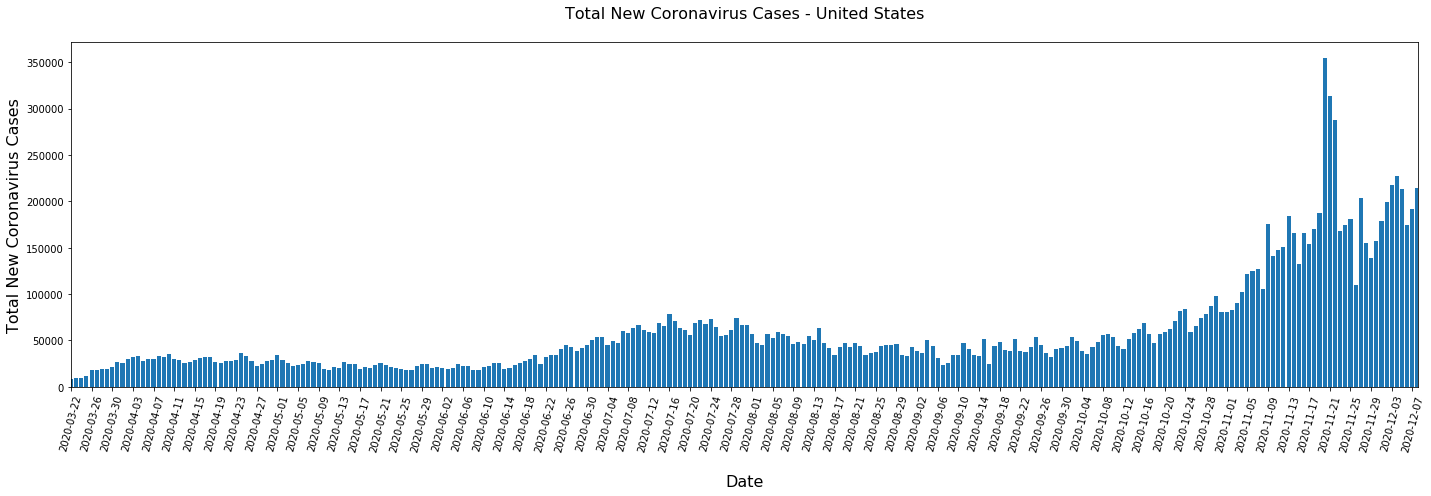

In [13]:
# Create a dataframe to show the trend of total US coronavirus cases by date
tot_us_cases_trend_df = covid_state_df.reset_index().set_index('Date')
tot_cases_gb = tot_us_cases_trend_df.groupby('Date')
tot_us_cases_trend_df = tot_cases_gb[['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths']].sum()
#Export dataframe to .csv file
tot_us_cases_trend_df.to_csv('Resources/tot_us_cases_trend_df.csv')

# Plot the new cases US data as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(tot_us_cases_trend_df.index.values, tot_us_cases_trend_df['New Cases'])
max_date = tot_us_cases_trend_df.index.max()
ax.set_xlim(['2020-03-22',max_date])

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=75)

# Set the plot titles and labels
# plt.grid(True)
plt.title('Total New Coronavirus Cases - United States\n', fontsize=16)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Total New Coronavirus Cases', fontsize=16)
plt.tight_layout()

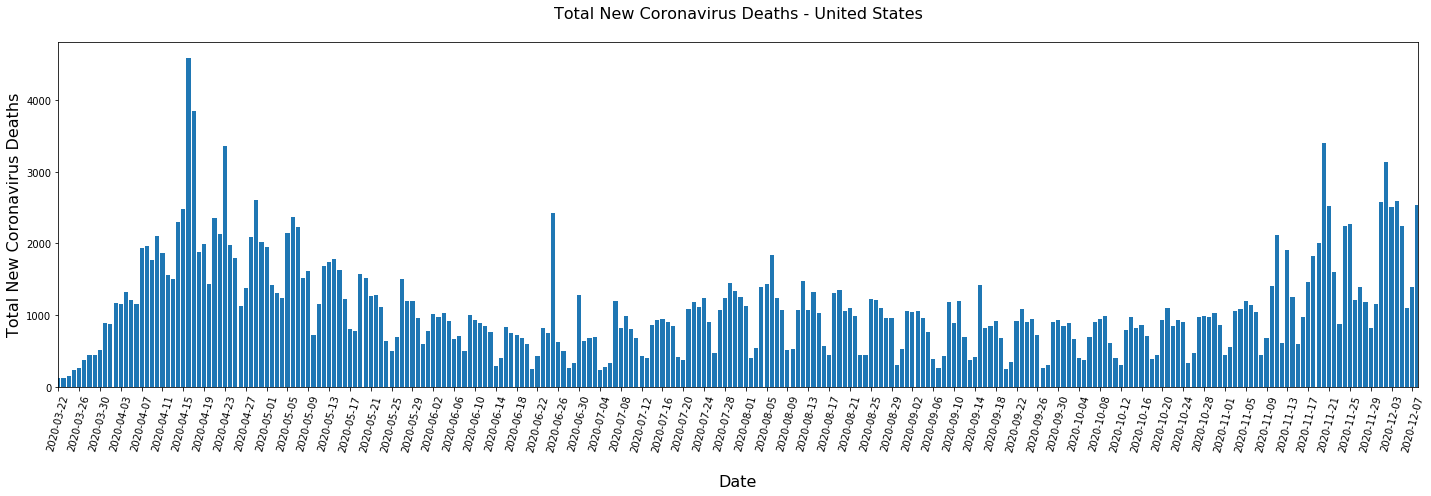

In [14]:
# Plot the new deaths US data as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(tot_us_cases_trend_df.index.values, tot_us_cases_trend_df['New Deaths'])
max_date = tot_us_cases_trend_df.index.max()
ax.set_xlim(['2020-03-22',max_date])

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=75)

# Set the plot titles and labels
# plt.grid(True)
plt.title('Total New Coronavirus Deaths - United States\n', fontsize=16)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Total New Coronavirus Deaths', fontsize=16)
plt.tight_layout()

### Total New Cases and New Deaths in The United States

In [15]:
state_group = covid_state_df.groupby('State')
covid_state_df=covid_state_df.sort_values(by='Date', ascending=False)
last_state_date_df = state_group.last()

# Show the total cases in the US
total_us_cases = last_state_date_df['Total Cases'].sum()
new_us_cases = last_state_date_df['New Cases'].sum()
total_us_deaths = last_state_date_df['Total Deaths'].sum()
new_us_deaths = last_state_date_df['New Deaths'].sum()
date = last_state_date_df['Date'].max()

print(f'Coronavirus stats for The United States as of: {date}')
print("\n"f'Total US Cases: {total_us_cases:,}')
print(f'Total New US Cases: {new_us_cases:,}')
print(f'Total US Deaths: {total_us_deaths:,}')
print(f'Total New US Deaths: {new_us_deaths:,}')

Coronavirus stats for The United States as of: 2020-12-08

Total US Cases: 15,097,605
Total New US Cases: 214,859
Total US Deaths: 284,890
Total New US Deaths: 2,531


### Seven Day Average of New Cases and New Deaths in The United States

In [16]:
us_avg = covid_state_df.reset_index()[['Date', 'New Cases', 'New Deaths']]
us_avg = us_avg.sort_values('Date', ascending=False)
us_avg_gb = us_avg.groupby('Date')
us_avg = us_avg_gb[['Date', 'New Cases', 'New Deaths']].sum()
us_avg = us_avg.sort_index(ascending=False)
us_avg = us_avg.reset_index().head(7)
date = us_avg['Date'].max()

us_avg_new_cases = round(us_avg['New Cases'].mean(),0)
us_avg_new_deaths = round(us_avg['New Deaths'].mean(),0)
print(f'7 Day average as of {date}:\n')
print(f'The seven day average for New Cases in the United States: {us_avg_new_cases:,}')
print(f'The seven day average for New Deaths in the United States: {us_avg_new_deaths:,}')

7 Day average as of 2020-12-08:

The seven day average for New Cases in the United States: 205,474.0
The seven day average for New Deaths in the United States: 2,216.0


### Top 10 States With the Most New Coronavirus Cases

In [17]:
# Show the top 5 states having the most coronavirus cases
last_state_date_df.sort_values(by=['Date', 'New Cases'], ascending=[False,False], inplace=True)
last_state_date_df.head(10)

,Total Cases,New Cases,Total Deaths,New Deaths,Fatality Rate,Latitude,Longitude,Date
State,,,,,,,,
Ohio,510018,25721,7103,81,0.0139,40.3888,-82.7649,2020-12-08
California,1415396,24568,20205,190,0.0143,36.1162,-119.6816,2020-12-08
Texas,1346643,14924,23372,186,0.0174,31.0545,-97.5635,2020-12-08
Arizona,378157,12314,6973,23,0.0184,33.7298,-111.4312,2020-12-08
Pennsylvania,442311,10104,11521,202,0.0260,40.5908,-77.2098,2020-12-08
New York,722464,9335,35118,84,0.0486,42.1657,-74.9481,2020-12-08
Florida,1073770,7985,19378,96,0.0180,27.7663,-81.6868,2020-12-08
Illinois,804174,7910,14384,170,0.0179,40.3495,-88.9861,2020-12-08
Michigan,443076,6676,10625,203,0.0240,43.3266,-84.5361,2020-12-08


### Total Cases by County Heatmap

In [18]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [19]:
# Store Lat and lng into locations
locations = map_county_df[['Latitude', "Longitude"]].astype(float)
total_cases=map_county_df['Total Cases'].astype(float)

In [20]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=total_cases,
                                 dissipating=False, max_intensity=.85,
                                 point_radius=3)                           
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

### Total Coronavirus cases in California

In [21]:
cal_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = cal_plots_df['State']=='California'
mask2 = cal_plots_df['State'] == 'Indiana'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

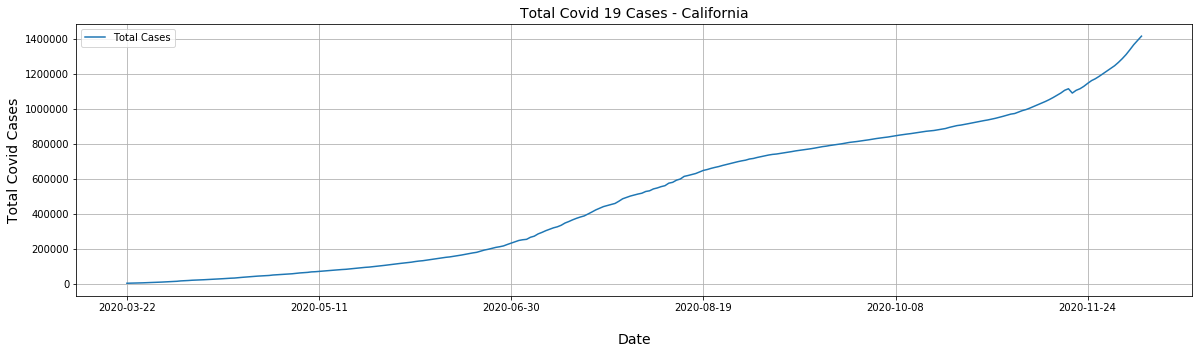

In [22]:
cal_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

plt.title("Total Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [23]:
tot_cases_today = last_state_date_df.loc['California']['Total Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus cases reported as of {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported as of 2020-12-08: 1,415,396


### Plot New Coronavirus cases in California

In [24]:
cal_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

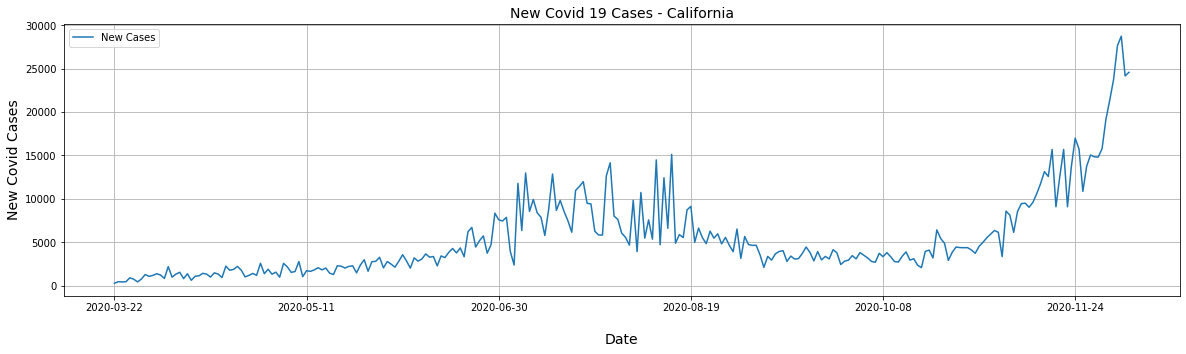

In [25]:
cal_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [26]:
new_cases_today = last_state_date_df.loc['California']['New Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-12-08: 24,568


### Plot Total Coronavirus Deaths in California

In [27]:
cal_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

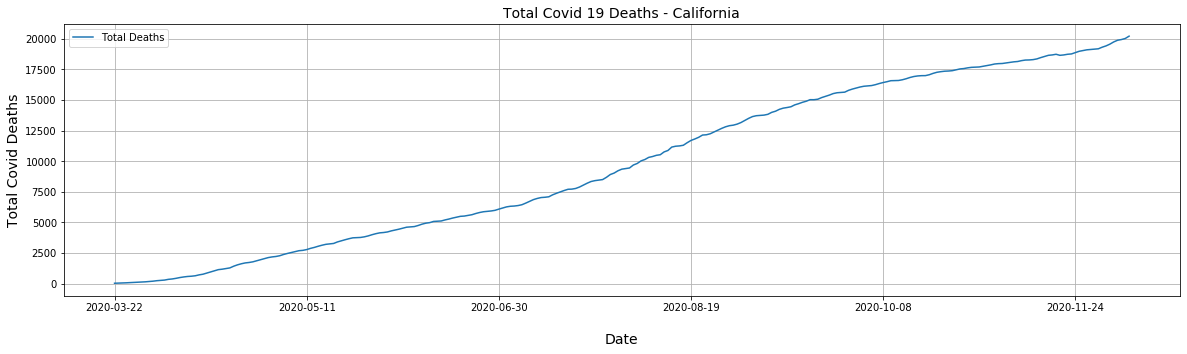

In [28]:
cal_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [29]:
tot_deaths = last_state_date_df.loc['California']['Total Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-12-08: 20,205


### Plot New Coronavirus Deaths in California

In [30]:
cal_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

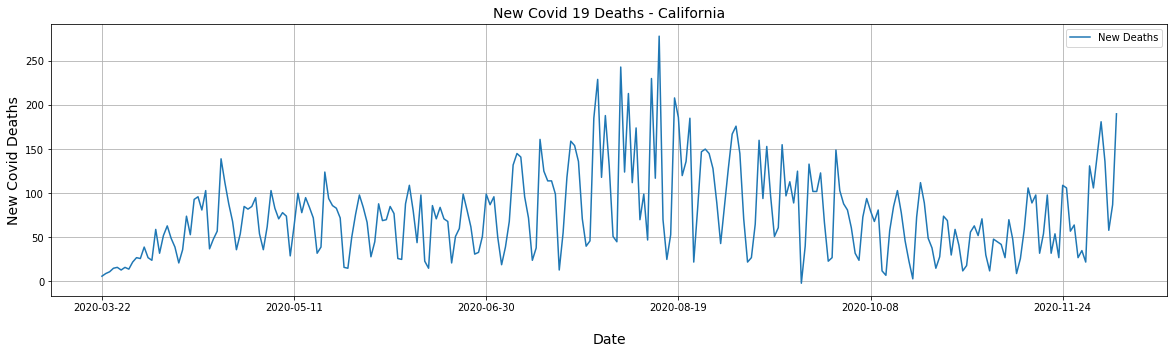

In [31]:
cal_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [32]:
new_deaths = last_state_date_df.loc['California']['New Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-12-08: 190


### Seven Day Average of New Cases and New Deaths in California

In [33]:
my_idx = covid_state_df.index.name
avg_sev_ca_df = covid_state_df.sort_values(by=[my_idx, 'Date'], ascending = [True, False])
avg_seven_ca_df = avg_sev_ca_df.loc['California'].head(7)
ca_date = avg_seven_ca_df['Date'].max()

avg_seven_ca_df = avg_seven_ca_df[['New Cases', 'New Deaths']].mean()
avg_seven_ca_df = pd.DataFrame(avg_seven_ca_df)

new_cases_avg = round(avg_seven_ca_df.loc['New Cases'][0],0)
new_deaths_avg = round(avg_seven_ca_df.loc['New Deaths'][0],0)
print(f'7 day avg as of: {ca_date}\n')
print(f'The 7 day average of New Cases in CA is {new_cases_avg:,}')
print(f'The 7 day average of New Deaths in CA is {new_deaths_avg:,}')

7 day avg as of: 2020-12-08

The 7 day average of New Cases in CA is 24,193.0
The 7 day average of New Deaths in CA is 129.0


### Total Coronavirus Cases - Los Angeles County, CA

In [34]:
# Create a dataframe based on county information
covid_county_df.sort_values(by='Date', ascending=False, inplace=True)
county_group = covid_county_df.groupby(['State', 'County'])
covid_county_last_df = county_group.first()
covid_county_last_df.sort_values(by=['State', 'New Cases'], ascending=[False, False], inplace=True)

# Show the total coronavirus cases by county in California
california_cases_by_county_df = covid_county_last_df.loc['California']
california_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Los Angeles,466321,8441,8000,64,2020-12-08,34.308284,-118.228241
Riverside,103221,3133,1513,25,2020-12-08,33.743150,-115.993358
Orange,90513,1671,1633,0,2020-12-08,33.701475,-117.764600
San Diego,95445,1276,1062,0,2020-12-08,33.034846,-116.736533
San Bernardino,108946,1018,1207,19,2020-12-08,34.840603,-116.177469
Contra Costa,27455,752,267,0,2020-12-08,37.919235,-121.928953
Merced,13637,709,194,3,2020-12-08,37.189224,-120.720903
Santa Clara,41316,692,512,1,2020-12-08,37.231049,-121.697046
Sacramento,43426,618,620,6,2020-12-08,38.451068,-121.342537


### Plot Total Coronavirus Cases in Los Angeles County, CA

Text(0, 0.5, 'Total Coronavirus Cases')

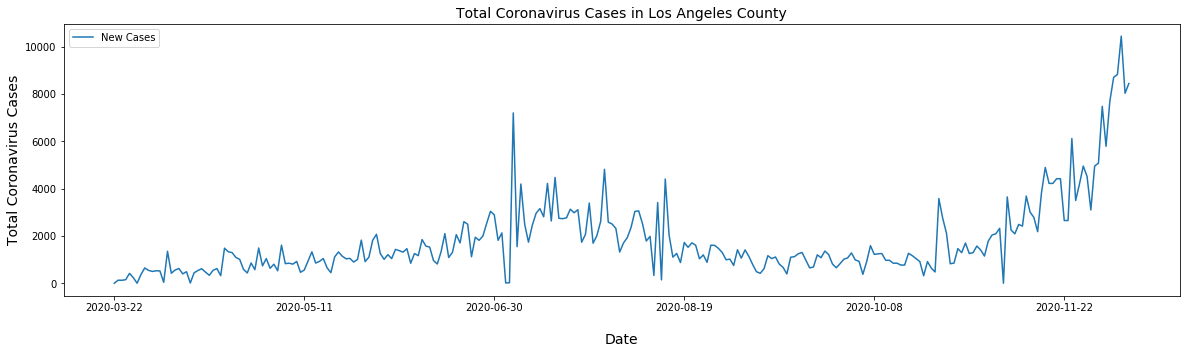

In [35]:
# Plot the number of cases for LA County
la_county_df = covid_county_df.loc['California'][['County','New Cases','Date']]
mask1 = la_county_df['County']=='Los Angeles'
la_county_df=la_county_df[mask1]
la_county_df.sort_values(by='Date', inplace=True)

la_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total Coronavirus Cases in Los Angeles County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total Coronavirus Cases", fontsize=14)

In [36]:
new_cases_df = la_county_df.sort_values(by='Date', ascending=False).head(1)
new_cases = new_cases_df.loc['California']['New Cases']
date = new_cases_df.loc['California']['Date']
tot_cases = california_cases_by_county_df.loc['Los Angeles']['Total Cases']
print(f'There were {new_cases:,} new cases reported for a total of {tot_cases:,} cases on {date} in LA County, CA.')

There were 8,441 new cases reported for a total of 466,321 cases on 2020-12-08 in LA County, CA.


### Seven Day Average of New Cases and New Deaths in Los Angeles County, CA

In [37]:
la_avg_df = covid_county_df.loc['California']
map_county = la_avg_df['County'] == 'Los Angeles'
la_avg_df = la_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
lac_date = la_avg_df['Date'].max()

la_avg_df = la_avg_df[['New Cases', 'New Deaths']].mean()
la_avg_df = pd.DataFrame(la_avg_df)

la_new_cases_avg = round(la_avg_df.loc['New Cases'][0],0)
la_new_deaths_avg = round(la_avg_df.loc['New Deaths'][0],0)

print(f'7 Day Average as of: {lac_date}\n')
print(f'The 7 day average of New Cases in Los Angeles County, CA: {la_new_cases_avg:,}')
print(f'The 7 day average of New Deaths in Los Angeles County, CA: {la_new_deaths_avg:,}')

7 Day Average as of: 2020-12-08

The 7 day average of New Cases in Los Angeles County, CA: 8,275.0
The 7 day average of New Deaths in Los Angeles County, CA: 43.0


### Total Coronavirus cases in Indiana

In [38]:
ind_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

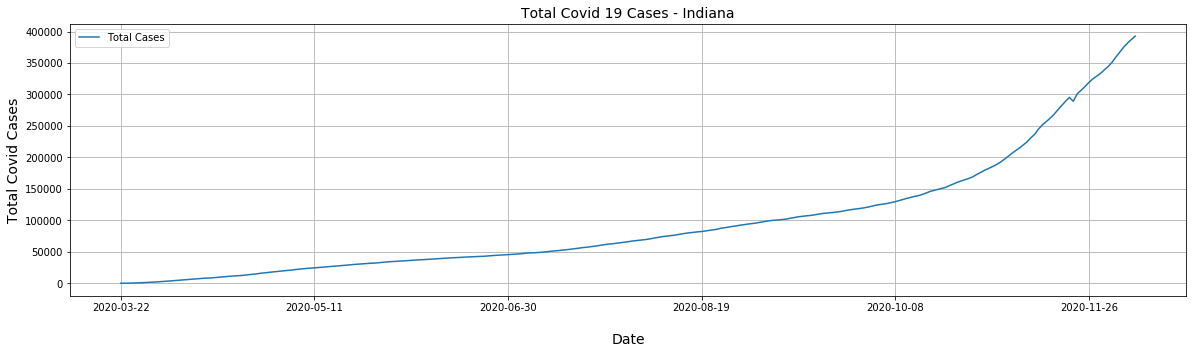

In [39]:
ind_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [40]:
tot_cases_today = last_state_date_df.loc['Indiana']['Total Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus cases reported as of {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported as of 2020-12-08: 392,663


### Plot New Coronavirus cases in Indiana

In [41]:
ind_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

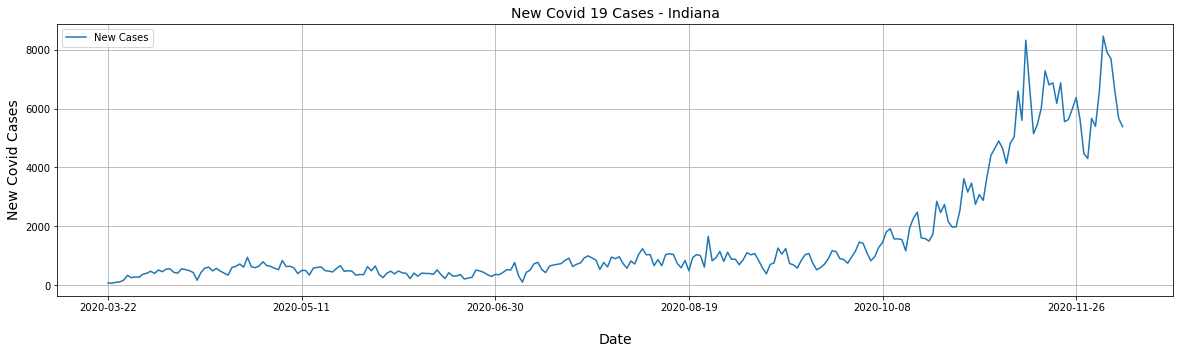

In [42]:
ind_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [43]:
new_cases_today = last_state_date_df.loc['Indiana']['New Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-12-08: 5,385


### Plot Total Coronavirus Deaths in Indiana

In [44]:
ind_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

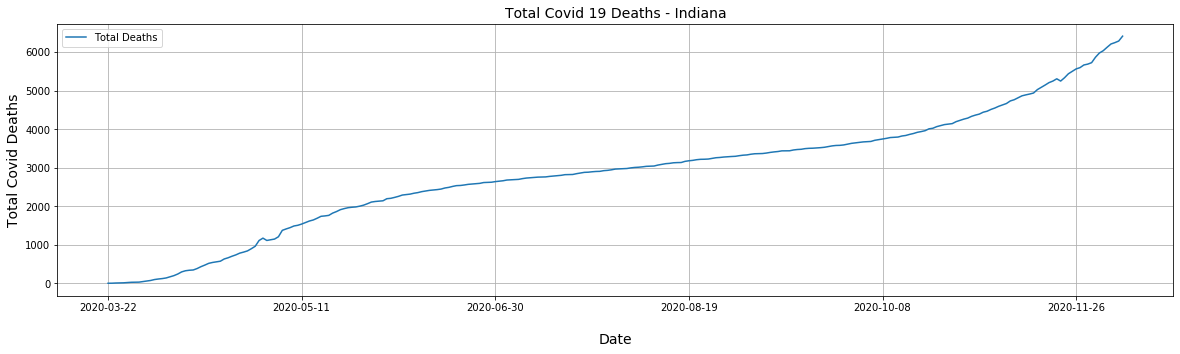

In [45]:
ind_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [46]:
tot_deaths = last_state_date_df.loc['Indiana']['Total Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-12-08: 6,410


### Plot New Coronavirus Deaths in Indiana

In [47]:
ind_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

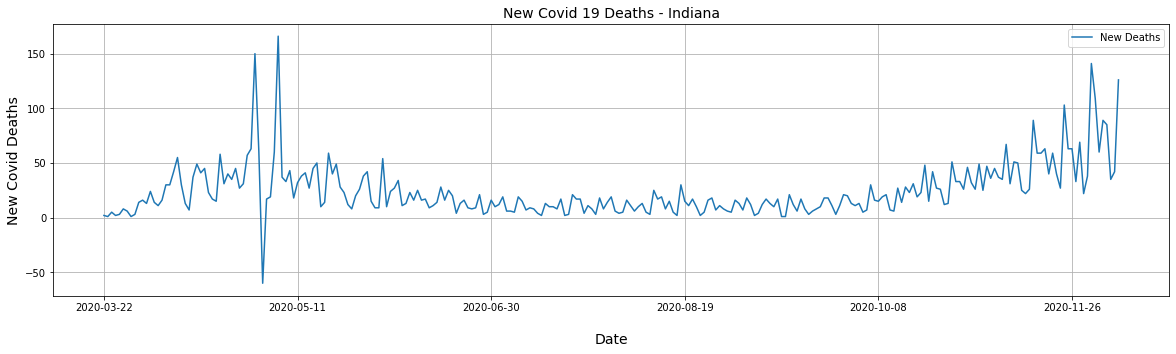

In [48]:
ind_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [49]:
new_deaths = last_state_date_df.loc['Indiana']['New Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-12-08: 126


### Seven Day Average of New Cases and New Deaths in Indiana

In [50]:
my_idx = covid_state_df.index.name
avg_sev_in_df = covid_state_df.sort_values(by=[my_idx, 'Date'], ascending = [True, False])
avg_seven_in_df = avg_sev_in_df.loc['Indiana'].head(7)
in_date = avg_seven_in_df['Date'].max()

avg_seven_in_df = avg_seven_in_df[['New Cases', 'New Deaths']].mean()
avg_seven_in_df = pd.DataFrame(avg_seven_in_df)
# avg_seven_ca_df

new_cases_avg = round(avg_seven_in_df.loc['New Cases'][0],0)
new_deaths_avg = round(avg_seven_in_df.loc['New Deaths'][0],0)
print(f'7 day avg as of: {in_date}\n')
print(f'The 7 day average of New Cases in IN is {new_cases_avg:,}')
print(f'The 7 day average of New Deaths in IN is {new_deaths_avg:,}')

7 day avg as of: 2020-12-08

The 7 day average of New Cases in IN is 6,899.0
The 7 day average of New Deaths in IN is 78.0


### Coronavirus in Fulton County, IN

In [51]:
# Show the total coronavirus cases by county in Indiana
indiana_cases_by_county_df = covid_county_last_df.loc['Indiana']
indiana_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Marion,53514,777,929,10,2020-12-08,39.781636,-86.138263
Lake,32816,368,501,6,2020-12-08,41.418743,-87.382776
Allen,22417,279,361,7,2020-12-08,41.091943,-85.068006
St. Joseph,20409,270,267,5,2020-12-08,41.617568,-86.290408
Hamilton,17209,262,191,5,2020-12-08,40.073065,-86.052447
Tippecanoe,11256,192,38,0,2020-12-08,40.388727,-86.894140
Johnson,8639,158,185,3,2020-12-08,39.489944,-86.101491
Porter,10121,145,104,4,2020-12-08,41.459869,-87.068489
Kosciusko,5553,125,52,1,2020-12-08,41.245217,-85.863123


### Plot Total Coronavirus Cases in Fulton County, IN

Text(0, 0.5, 'Total New Coronavirus Cases')

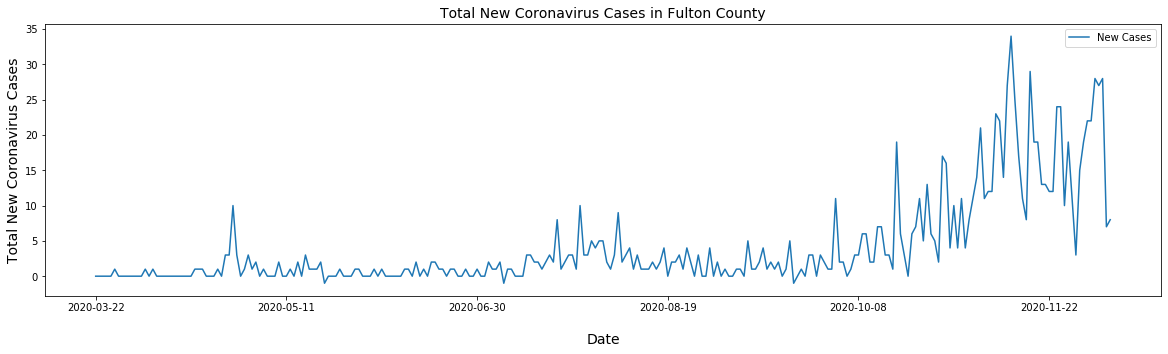

In [52]:
# Plot the number of cases for Fulton County
fulton_county_df = covid_county_df.loc['Indiana'][['County','New Cases','Date']]
mask1 = fulton_county_df['County']=='Fulton'
fulton_county_df=fulton_county_df[mask1]
fulton_county_df.sort_values(by='Date', inplace=True)

fulton_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total New Coronavirus Cases in Fulton County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total New Coronavirus Cases", fontsize=14)

In [53]:
new_cases_df = fulton_county_df.sort_values(by='Date', ascending=False).head(1)
new_cases = new_cases_df.loc['Indiana']['New Cases']
date = new_cases_df.loc['Indiana']['Date']
tot_cases = indiana_cases_by_county_df.loc['Fulton']['Total Cases']
print(f'There were {new_cases:,} new cases reported for a total of {tot_cases} cases on {date} in Fulton County, IN.')

There were 8 new cases reported for a total of 1062 cases on 2020-12-08 in Fulton County, IN.


### Seven Day Average of New Cases and New Deaths in Fulton County, IN

In [54]:
fc_avg_df = covid_county_df.loc['Indiana']
map_county = fc_avg_df['County'] == 'Fulton'
fc_avg_df = fc_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
fc_date = fc_avg_df['Date'].max()

fc_avg_df = fc_avg_df[['New Cases', 'New Deaths']].mean()
fc_avg_df = pd.DataFrame(fc_avg_df)

fc_new_cases_avg = round(fc_avg_df.loc['New Cases'][0],0)
fc_new_deaths_avg = round(fc_avg_df.loc['New Deaths'][0],2)
print(f'7 day average as of: {fc_date}\n')
print(f'The 7 day average of New Cases in Fulton County, IN is {fc_new_cases_avg:,}')
print(f'The 7 day average of New Deaths in Fulton County, IN is {fc_new_deaths_avg:,}')

7 day average as of: 2020-12-08

The 7 day average of New Cases in Fulton County, IN is 20.0
The 7 day average of New Deaths in Fulton County, IN is 0.29


### New Covid Case Data for Santa Clarita Valley, CA

In [55]:
scv_data_path=('Resources/Covid_19_Santa_Clarita_Valley.xlsx')
scv_covid_df = pd.read_excel(scv_data_path)
scv_covid_df.set_index('Date', inplace = True)

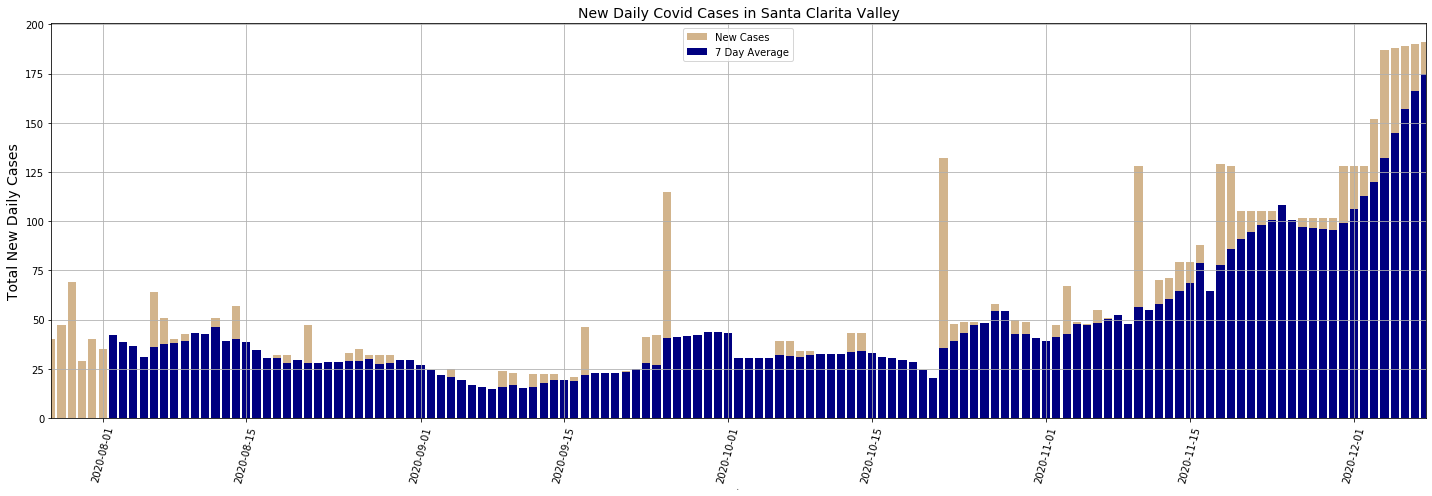

In [56]:
# import the Santa Clarita data into a line chart

# Plot the new cases SCV as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(scv_covid_df.index.values, scv_covid_df['New Cases'], color='tan')
ax.bar(scv_covid_df.index.values, scv_covid_df['7 Day Average'], color='navy')
min_date = scv_covid_df.index.min()
max_date = scv_covid_df.index.max()
ax.set_xlim([min_date,max_date])
ax.legend(['New Cases', '7 Day Average'], loc='best')
ax.grid(True)

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::1])
plt.xticks(rotation=75)

# ax.set_xticklabels('date_list')

plt.title('New Daily Covid Cases in Santa Clarita Valley', fontsize=14)
plt.xlabel('Date', fontsize=1)
plt.ylabel('Total New Daily Cases', fontsize=14)
plt.tight_layout()

In [57]:
scv_covid_df = scv_covid_df.sort_index(ascending=False)
scv_covid_avg_df = scv_covid_df.head(7)
date_val = scv_covid_df.index.max().date()
date_val = (f'{date_val.year}-{date_val.month}-{date_val.day}')

tot_cases = scv_covid_avg_df.loc[date_val]['Total Cases'][0]
new_cases = scv_covid_avg_df.loc[date_val]['New Cases'][0]
avg_cases = round(scv_covid_avg_df['New Cases'].mean(),0)

print(f'Covid data in Santa Clarita Valley as of: {date_val}:\n')
print(f'Total covid cases in Santa Clarita Valley: {tot_cases}')
print(f'New covid cases in Santa Clarita Valley: {new_cases}')
print(f'Seven day average of new covid cases in Santa Clarita Valley: {avg_cases}')

Covid data in Santa Clarita Valley as of: 2020-12-8:

Total covid cases in Santa Clarita Valley: 10841.0
New covid cases in Santa Clarita Valley: 191.0
Seven day average of new covid cases in Santa Clarita Valley: 175.0
